# Client: ABC Tech | Category: ITSM - ML Project Ref: PM-PR-0012

## Business Case:

* ABC Tech is an mid-size organisation operation in IT-enabled business segment over a decade. On an average ABC Tech receives 22-25k IT incidents/tickets , which were handled to best practice Information Technology Infrastructure Library (ITIL) frameworkwith incident management , problem management, change management and configuration management processes. These ITIL practices attained matured process level and a recent audit confirmed that further improvement initiatives may not yield return of investment.

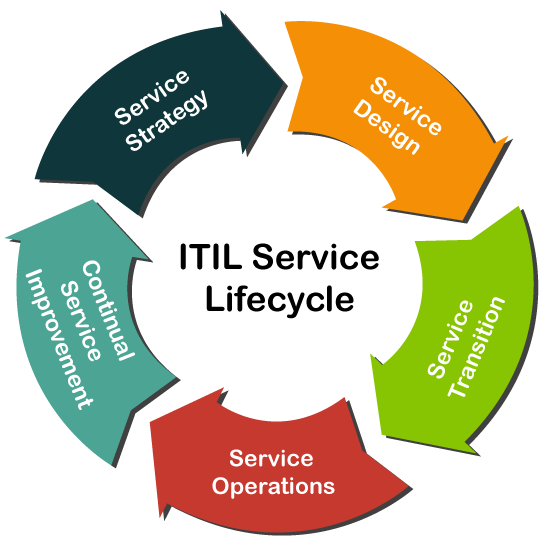

* ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor.
* Machine Learning as way to improve ITSM processes ABC Tech management recently attended Machine Learning conference on ML for   ITSM.Machine learning looks prospective to improve ITSM processes through prediction and automation. They came up with 3 key     areas, where ML can help ITSM process in ABC Tech.

## Problem Statement

   1) Predicting High Priority Tickets: ABC Tech aims to develop an ML model that can predict high-priority tickets,                  specifically those categorized as priority 1 and 2. This prediction will allow them to take proactive measures to address        issues or incidents before they escalate.

   3) Auto-Tagging Tickets: ABC Tech intends to implement a text classification ML model to automatically assign correct               priorities and departments to incoming tickets. This automation will reduce reassignment and related delays in ticket           handling.

   4) Predicting RFC and ITSM Asset Misconfigurations: The organization aims to create predictive models for Request for Change       (RFC) and detect potential failures or misconfigurations in ITSM assets. Identifying these issues in advance will help in       preventing disruptions and improving overall ITSM asset management.

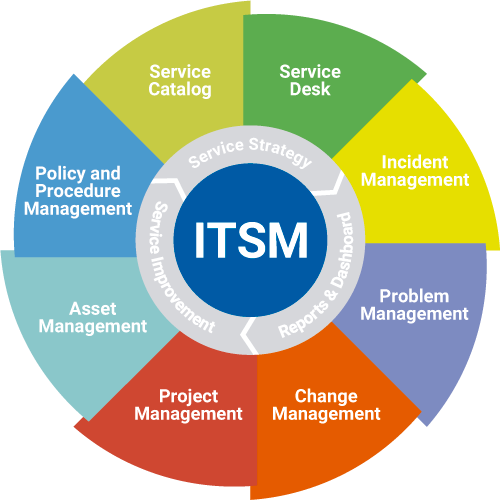
* ITSM, or IT service management, is the process of managing the delivery of IT services to customers. It includes all the activities involved in planning, designing, building, implementing, deploying, improving, and supporting services for internal and external stakeholders. The goal of ITSM is to consistently improve services to meet business objectives

## Domain Analysis

* The dataset that ABC Tech plans to use for these ML initiatives comprises a total of approximately 46,000 records spanning the   years 2012, 2013, and 2014. The data is stored in a MySQL database with read-only access, and the relevant connection details   are provided.
* Here's a summary of some key fields in the dataset:

1) CI_Name: Configuration Item Name
2) CI_Cat: Configuration Item Category
3) CI_Subcat: Configuration Item Subcategory
4) Incident_ID: Incident Identifier
5) Status: Incident Status (e.g., Closed)
6) Impact: Impact level
7) Urgency: Urgency level
8) Priority: Incident Priority
9) Category: Incident Category
10) KB_number: Knowledge Base Number
11) Alert_Status: Alert Status
12) No_of_Reassignments: Number of Reassignments
13) Open_Time: Incident Open Time
14) Reopen_Time: Incident Reopen Time
15) Resolved_Time: Incident Resolved Time
16) Close_Time: Incident Close Time
17) Handle_Time_hrs: Time taken to handle the incident (in hours)
18) Closure_Code: Code for incident closure
19) No_of_Related_Interactions: Number of Related Interactions
20) Related_Interaction: Identifier for Related Interaction
21) No_of_Related_Incidents: Number of Related Incidents
22) No_of_Related_Changes: Number of Related Changes
23) Related_Change: Identifier for Related Change

In [1]:
# installing pymysql and mysql-connector package for making connections to database server
!pip install pymysql
!pip install mysql-connector

## Important Library

In [1596]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import mysql.connector
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

# Data collection

## MySQL Database Server

In [3]:
connection = mysql.connector.connect(
    host="18.136.157.135",
    user="dm_team",
    password="DM!$Team@&27920!",
    database="project_itsm"
)

In [4]:
# getting all tables of bank goodcredit
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_itsm
0           dataset_list


In [5]:
data_view=pd.read_sql_query('select* from dataset_list',connection)

In [6]:
data_view

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


In [7]:
data_view.to_csv("ITSM",index=False)

In [1597]:
data=pd.read_csv("ITSM")
pd.set_option('display.max_columns',None)

## Basic checks

In [1598]:
data.head(5)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [1599]:
data.sample(5)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
44246,SBA000689,application,Server Based Application,WBS000228,IM0044645,Closed,5,5,5.0,0.507546,request for information,KM0000656,closed,0.0,19-03-2014 13:26,NaN,19-03-2014 13:34,19-03-2014 13:35,"0,143611111",No error - works as designed,1.0,SD0137925,NaN,NaN,NaN
16537,SUB000523,subapplication,Web Based Application,WBS000073,IM0016751,Closed,5,5,5.0,0.477373,incident,KM0001155,closed,0.0,26-11-2013 10:13,NaN,26-11-2013 15:26,26-11-2013 15:27,"5,22,72,22,222",User manual not used,1.0,SD0047948,NaN,NaN,NaN
14491,WBA000011,application,Web Based Application,WBS000152,IM0014692,Closed,5,5,5.0,0.925594,incident,KM0000075,closed,0.0,19-11-2013 08:37,NaN,20-11-2013 13:05,20-11-2013 13:05,"1,49,71,66,667",Software,NaN,#N/B,1.0,NaN,NaN
31456,SUB000456,subapplication,Web Based Application,WBS000073,IM0031745,Closed,4,4,4.0,0.260756,incident,KM0000738,closed,0.0,28-01-2014 11:37,NaN,28-01-2014 13:37,28-01-2014 13:37,"2,00,58,33,333",Software,1.0,SD0096410,NaN,NaN,NaN
18046,SBA000607,application,Server Based Application,WBS000263,IM0018270,Closed,4,4,4.0,0.172329,incident,KM0001106,closed,6.0,02-12-2013 11:08,NaN,09-12-2013 11:18,09-12-2013 11:19,"5,26,85,83,333",Other,1.0,SD0052548,NaN,NaN,NaN


In [1600]:
data.CI_Name.unique()

array(['SUB000508', 'WBA000124', 'DTA000024', ..., 'CBD000595',
       'CBD000443', 'SWT000008'], dtype=object)

In [1601]:
data.CI_Cat.unique()

array(['subapplication', 'application', 'computer', nan, 'displaydevice',
       'software', 'storage', 'database', 'hardware', 'officeelectronics',
       'networkcomponents', 'applicationcomponent', 'Phone'], dtype=object)

In [1602]:
data.CI_Subcat.unique()

array(['Web Based Application', 'Desktop Application',
       'Server Based Application', 'SAP', 'Client Based Application',
       'Citrix', 'Standard Application', 'Windows Server', 'Laptop',
       'Linux Server', nan, 'Monitor', 'Automation Software', 'SAN',
       'Banking Device', 'Desktop', 'Database', 'Oracle Server',
       'Keyboard', 'Printer', 'Exchange', 'System Software', 'VDI',
       'Encryption', 'Omgeving', 'MigratieDummy', 'Scanner', 'Controller',
       'DataCenterEquipment', 'KVM Switches', 'Switch',
       'Database Software', 'Network Component', 'Unix Server', 'Lines',
       'ESX Cluster', 'zOS Server', 'SharePoint Farm', 'NonStop Server',
       'Application Server', 'Security Software', 'Thin Client',
       'zOS Cluster', 'Router', 'VMWare', 'Net Device', 'Neoview Server',
       'MQ Queue Manager', 'UPS', 'Number', 'Iptelephony',
       'Windows Server in extern beheer', 'Modem', 'X86 Server',
       'ESX Server', 'Virtual Tape Server', 'IPtelephony',
     

In [1603]:
data.Status.unique()

array(['Closed', 'Work in progress'], dtype=object)

In [1604]:
data.Impact.unique()

array(['4', '3', 'NS', '5', '2', '1'], dtype=object)

In [1605]:
data.Urgency.unique()

array([4, 3, 5, 2, 1, '5', '3', '4', '2', '1', '5 - Very Low'],
      dtype=object)

In [1606]:
data.Priority.unique()

array([ 4.,  3., nan,  5.,  2.,  1.])

In [1607]:
data.Category.unique()

array(['incident', 'request for information', 'complaint',
       'request for change'], dtype=object)

In [1608]:
data.Alert_Status.unique()

array(['closed'], dtype=object)

In [1609]:
data.No_of_Reassignments.unique()

array([26., 33.,  3., 13.,  2.,  4.,  5.,  6.,  8., 17.,  1.,  7., 12.,
        0., 11.,  9., 25., 30., 15., 37., 32., 22., 10., 21., 19., 14.,
       46., 18., 16., 42., 23., 39., 20., 45., 38., 24., 34., 29., 27.,
       31., nan, 36.])

In [1610]:
data.Closure_Code.unique()

array(['Other', 'Software', 'No error - works as designed',
       'Operator error', 'Unknown', 'Data', 'Referred', 'Hardware',
       'Questions', 'User error', 'Inquiry', 'User manual not used',
       'Kwaliteit van de output', nan, 'Overig'], dtype=object)

In [1611]:
data.No_of_Related_Interactions.unique()

array([  1.,   2.,   3.,  14.,   7.,   4.,   5., 370.,   9.,  11.,  54.,
        nan, 288.,  34.,  44.,  39.,  12.,  42.,   6.,   8.,  28.,  29.,
        13.,  18.,  20.,  15.,  31.,  88.,  30.,  41.,  74.,  16.,  24.,
        17.,  57.,  33.,  10., 118.,  45.,  55.,  40.,  19.,  22.,  23.,
        37.,  26.,  43.,  25.,  27.,  21.])

In [1612]:
data.No_of_Related_Incidents.unique()

array([ 2.,  1., nan, 23.,  4.,  3.,  7., 11., 12., 54., 24., 16.,  8.,
        6., 25., 14., 10.,  9.,  5., 17., 26., 21., 63., 13., 15.])


# Domain Analysis:
Certainly! Domain analysis is an essential step in any data science or machine learning project. It involves gaining a deep understanding of the domain-specific aspects of the problem you're trying to solve. In this case, we're analyzing the domain of IT Service Management (ITSM) within the context of ABC Tech's business case. Here's a domain analysis for ITSM:

### 1. IT Service Management (ITSM):

* Definition: IT Service Management (ITSM) refers to a set of practices and processes used by organizations to design, deliver, manage, and improve IT services for their customers and end-users.
* Importance: ITSM ensures that IT services are aligned with business goals, reliable, and efficiently delivered, leading to enhanced customer satisfaction and business performance.
### 2. Incident Management:

* Definition: Incident Management is a core ITSM process that involves identifying, categorizing, prioritizing, and resolving incidents to restore normal service operations as quickly as possible.
* Challenges: Common challenges in incident management include handling a high volume of incidents, determining incident priorities, minimizing response times, and reducing the impact on end-users.
### 3. Priority in ITSM:

* Definition: Priority is a classification system used to categorize incidents based on their severity and impact on business operations. In ITIL (IT Infrastructure Library) framework, there are typically four priority levels: Priority 1 (Critical), Priority 2 (High), Priority 3 (Medium), and Priority 4 (Low).
* Importance: Prioritizing incidents helps organizations allocate resources effectively and respond to critical issues promptly.
### 4. ITIL Framework:

* Definition: ITIL is a widely adopted framework for ITSM that provides best practices and guidelines for managing IT services, including incident management, problem management, change management, and configuration management.
* Maturity Levels: ITIL processes can mature over time, starting from ad-hoc practices and progressing to well-defined, controlled, and optimized processes. A mature ITIL framework leads to improved service quality and efficiency.
### 5. Machine Learning in ITSM:

* Application: Machine learning can be applied to ITSM processes to predict incidents, automate ticket classification, forecast resource needs, and detect anomalies or misconfigurations in IT assets.
* Benefits: ML can enhance incident response, reduce manual workload, improve service quality, and proactively identify issues before they impact operations.
### 6. Data Considerations:

* Data Sources: Data for ITSM projects typically come from various sources, including incident tracking systems, service logs, configuration databases, and customer feedback.
* Data Quality: Data quality is critical, as inaccurate or incomplete data can lead to incorrect predictions and decisions.
* Privacy and Compliance: ITSM data often contains sensitive information, so privacy and compliance with data protection regulations (e.g., GDPR) are crucial considerations.
### 7. Metrics and KPIs:

* Key Metrics: Key Performance Indicators (KPIs) in ITSM include Mean Time to Resolve (MTTR), Incident Response Time, Incident Closure Rate, and Customer Satisfaction.
* Monitoring: Continuous monitoring of KPIs helps organizations assess the effectiveness of their ITSM processes and make improvements.
### 8. Stakeholders:

* Internal Stakeholders: IT teams, IT managers, incident responders, change management teams.
  External Stakeholders: End-users, customers, auditors (for compliance).
### 9. Challenges:

* Scalability: Handling a large volume of incidents efficiently can be challenging.
* Data Integration: Integrating data from disparate sources can be complex.
* Change Management: Implementing ML solutions may require organizational and cultural changes.

In [1613]:
pd.set_option('display.max_rows',None)
data.No_of_Related_Incidents.value_counts()

No_of_Related_Incidents
1.0     1057
2.0       74
3.0       20
4.0       13
5.0        8
6.0        8
9.0        6
8.0        5
11.0       4
12.0       4
7.0        4
17.0       3
16.0       3
10.0       2
24.0       2
14.0       1
25.0       1
23.0       1
54.0       1
26.0       1
21.0       1
63.0       1
13.0       1
15.0       1
Name: count, dtype: int64

In [1614]:
import datetime

In [1615]:
data.shape

(46606, 25)

In [1616]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [1617]:
data.describe()

,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [1618]:
data.describe(include='O')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,KB_number,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46606,2284,44826,46606,46605,46146,46606,560
unique,3019,12,64,274,46606,2,6,11,4,1825,1,34636,2244,33627,34528,30638,14,43060,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,incident,KM0001106,closed,24-03-2014 08:54,29-10-2013 15:03,10-10-2013 12:53,02-10-2013 15:20,0,Other,#MULTIVALUE,C00003013
freq,3050,32900,18811,13342,1,46597,22556,15526,37748,1106,46606,7,2,7,21,236,16470,3434,110


* Unique value will be 1 for constant column.Here, Alert_Status is the constant feature. so we drop the column.

In [1619]:
data.isnull().sum().sort_values(ascending=False)

Related_Change                46046
No_of_Related_Changes         46046
No_of_Related_Incidents       45384
Reopen_Time                   44322
Resolved_Time                  1780
Priority                       1380
Closure_Code                    460
No_of_Related_Interactions      114
CI_Subcat                       111
CI_Cat                          111
Handle_Time_hrs                   1
No_of_Reassignments               1
Related_Interaction               0
Close_Time                        0
CI_Name                           0
Open_Time                         0
KB_number                         0
Category                          0
number_cnt                        0
Urgency                           0
Impact                            0
Status                            0
Incident_ID                       0
WBS                               0
Alert_Status                      0
dtype: int64

In [1620]:
data.dtypes

CI_Name                        object
CI_Cat                         object
CI_Subcat                      object
WBS                            object
Incident_ID                    object
Status                         object
Impact                         object
Urgency                        object
Priority                      float64
number_cnt                    float64
Category                       object
KB_number                      object
Alert_Status                   object
No_of_Reassignments           float64
Open_Time                      object
Reopen_Time                    object
Resolved_Time                  object
Close_Time                     object
Handle_Time_hrs                object
Closure_Code                   object
No_of_Related_Interactions    float64
Related_Interaction            object
No_of_Related_Incidents       float64
No_of_Related_Changes         float64
Related_Change                 object
dtype: object

In [1621]:
data.duplicated().sum()

0

In [1622]:
print(data["CI_Subcat"].unique().tolist())

['Web Based Application', 'Desktop Application', 'Server Based Application', 'SAP', 'Client Based Application', 'Citrix', 'Standard Application', 'Windows Server', 'Laptop', 'Linux Server', nan, 'Monitor', 'Automation Software', 'SAN', 'Banking Device', 'Desktop', 'Database', 'Oracle Server', 'Keyboard', 'Printer', 'Exchange', 'System Software', 'VDI', 'Encryption', 'Omgeving', 'MigratieDummy', 'Scanner', 'Controller', 'DataCenterEquipment', 'KVM Switches', 'Switch', 'Database Software', 'Network Component', 'Unix Server', 'Lines', 'ESX Cluster', 'zOS Server', 'SharePoint Farm', 'NonStop Server', 'Application Server', 'Security Software', 'Thin Client', 'zOS Cluster', 'Router', 'VMWare', 'Net Device', 'Neoview Server', 'MQ Queue Manager', 'UPS', 'Number', 'Iptelephony', 'Windows Server in extern beheer', 'Modem', 'X86 Server', 'ESX Server', 'Virtual Tape Server', 'IPtelephony', 'NonStop Harddisk', 'Firewall', 'RAC Service', 'zOS Systeem', 'Instance', 'NonStop Storage', 'Protocol', 'Tap

In [1623]:
pd.set_option("display.max_rows", None);
print(data["CI_Subcat"].value_counts())

CI_Subcat
Server Based Application           18811
Web Based Application              15311
Desktop Application                 3876
Laptop                              1921
SAP                                 1199
Banking Device                       916
Citrix                               767
SAN                                  549
Client Based Application             492
Desktop                              423
DataCenterEquipment                  277
System Software                      272
Monitor                              212
Database                             211
Windows Server                       153
Controller                           146
Exchange                             130
Printer                               88
Omgeving                              86
Standard Application                  85
Scanner                               64
MigratieDummy                         60
Linux Server                          55
Automation Software                   55
Encryp

# Basic Checks Report:
## Overview:
When working with IT Service Management (ITSM) data or any dataset, it's essential to perform basic data checks to ensure the quality and integrity of the data. These basic checks help identify issues early on and ensure that your analysis or project is based on reliable data.

* Data Shape: We Check the dimensions of the dataset, i.e., the number of rows and columns, using data.shape. Data Contains 46606 Rows and 25 columns. Data Types: We Verified that the data types of each column are as expected usingdata.dtypes.Priority,number_cnt,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,No_of_Reassignments are in float64 and remaining columns are in object.

* Descriptive Statistics: We Used data.describe().T to get summary statistics (mean, min, max, etc.) for numerical columns. Use data.describe(include='O').T for a summary of categorical columns.

* Unique Values: Checked the number of unique values in categorical columns using data['column'].unique(). here, One constant columns are there. so we dropped that column.

* Value Counts: Examined the distribution of categorical values using df['column'].value_counts().

The goal is to ensure that our data is clean, complete, and suitable for analysis or further processing.

# Data Preprocessing

In [1624]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [1625]:
data.No_of_Related_Changes.unique()

array([nan,  1.,  2.,  3.,  9.])

### CHECK MISSING VALUE

In [1626]:
data.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [1627]:
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=["Missing_Value","Missing_Percentage"])
    return null_value
missing_value(data)

,Missing_Value,Missing_Percentage
CI_Name,0,0.000000
CI_Cat,111,0.238167
CI_Subcat,111,0.238167
WBS,0,0.000000
Incident_ID,0,0.000000
Status,0,0.000000
Impact,0,0.000000
Urgency,0,0.000000
Priority,1380,2.960992
number_cnt,0,0.000000


In [1628]:
# Drop columns with a high percentage of missing values
data.drop(["Reopen_Time","Related_Change","No_of_Related_Incidents"],axis=1,inplace=True)

In [1629]:
num_data=data.select_dtypes(include=["float64","int64"]).columns
num_data

Index(['Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions', 'No_of_Related_Changes'],
      dtype='object')

In [1630]:
cat_data=data.select_dtypes(include=["O"]).columns
cat_data

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Category', 'KB_number', 'Alert_Status',
       'Open_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'Closure_Code', 'Related_Interaction'],
      dtype='object')

## Replacing Null Values for No_of_Related_Changes

In [1631]:
data.No_of_Related_Changes.isnull().sum()

46046

In [1632]:
data['No_of_Related_Changes'].value_counts()

No_of_Related_Changes
1.0    536
2.0     21
3.0      2
9.0      1
Name: count, dtype: int64

In [1633]:
data.loc[data['No_of_Related_Changes'].isnull()==True,'No_of_Related_Changes']=data['No_of_Related_Changes'].mode()[0]

In [1634]:
data['No_of_Related_Changes'].value_counts()

No_of_Related_Changes
1.0    46582
2.0       21
3.0        2
9.0        1
Name: count, dtype: int64

## Replacing Null Values for Resolved_Time

In [1635]:
data.Resolved_Time.isnull().sum()

1780

In [1637]:
data["Resolved_Time"].mode()

0    10-10-2013 12:53
Name: Resolved_Time, dtype: object

In [1638]:
data.loc[data['Resolved_Time'].isnull()==True,'Resolved_Time']=data['Resolved_Time'].mode()[0]

# Replacing Null Values for Priority

In [1640]:
data.Priority.isnull().sum()

1380

In [1641]:
data['Priority'].value_counts()

Priority
4.0    22717
5.0    16486
3.0     5323
2.0      697
1.0        3
Name: count, dtype: int64

In [1642]:
# Impute missing values for 'Priority' with the mode
data.loc[data['Priority'].isnull()==True,'Priority']=data['Priority'].mode()[0]

In [1643]:
data['Priority'].value_counts()

Priority
4.0    24097
5.0    16486
3.0     5323
2.0      697
1.0        3
Name: count, dtype: int64

# Replacing Null Values for Closure_Code

In [1644]:
data.Closure_Code.isnull().sum()

460

In [1645]:
data['Closure_Code'].value_counts()

Closure_Code
Other                           16470
Software                        13027
User error                       3554
No error - works as designed     3530
Hardware                         2999
Data                             2209
Unknown                          1590
Operator error                   1539
User manual not used              765
Inquiry                           162
Referred                          158
Questions                         132
Kwaliteit van de output            10
Overig                              1
Name: count, dtype: int64

In [1646]:
data["Closure_Code"].mode()

0    Other
Name: Closure_Code, dtype: object

In [1647]:
# Impute missing values for 'Closure_Code' with the mode
data.loc[data['Closure_Code'].isnull()==True,'Closure_Code']=data['Closure_Code'].mode()[0]

In [1648]:
data['Closure_Code'].value_counts()

Closure_Code
Other                           16930
Software                        13027
User error                       3554
No error - works as designed     3530
Hardware                         2999
Data                             2209
Unknown                          1590
Operator error                   1539
User manual not used              765
Inquiry                           162
Referred                          158
Questions                         132
Kwaliteit van de output            10
Overig                              1
Name: count, dtype: int64

# Replacing Null Values for CI_Cat

In [1649]:
data.CI_Cat.isnull().sum()

111

In [1650]:
data['CI_Cat'].value_counts()

CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64

In [1651]:
data["CI_Cat"].mode()

0    application
Name: CI_Cat, dtype: object

In [1652]:
# Impute missing values for 'CI_Cat' with the mode
data.loc[data['CI_Cat'].isnull()==True,'CI_Cat']=data['CI_Cat'].mode()[0]

In [1653]:
data['CI_Cat'].value_counts()

CI_Cat
application             33011
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64

# Replacing Null Values for CI_Subcat

In [1654]:
data.CI_Subcat.isnull().sum()

111

In [1655]:
data['CI_Subcat'].value_counts()

CI_Subcat
Server Based Application           18811
Web Based Application              15311
Desktop Application                 3876
Laptop                              1921
SAP                                 1199
Banking Device                       916
Citrix                               767
SAN                                  549
Client Based Application             492
Desktop                              423
DataCenterEquipment                  277
System Software                      272
Monitor                              212
Database                             211
Windows Server                       153
Controller                           146
Exchange                             130
Printer                               88
Omgeving                              86
Standard Application                  85
Scanner                               64
MigratieDummy                         60
Linux Server                          55
Automation Software                   55
Encryp

In [1656]:
data["CI_Subcat"].mode()

0    Server Based Application
Name: CI_Subcat, dtype: object

In [1657]:
# Impute missing values for 'CI_Subcat' with the mode
data.loc[data['CI_Subcat'].isnull()==True,'CI_Subcat']=data['CI_Subcat'].mode()[0]

In [1658]:
data['CI_Subcat'].value_counts()

CI_Subcat
Server Based Application           18922
Web Based Application              15311
Desktop Application                 3876
Laptop                              1921
SAP                                 1199
Banking Device                       916
Citrix                               767
SAN                                  549
Client Based Application             492
Desktop                              423
DataCenterEquipment                  277
System Software                      272
Monitor                              212
Database                             211
Windows Server                       153
Controller                           146
Exchange                             130
Printer                               88
Omgeving                              86
Standard Application                  85
Scanner                               64
MigratieDummy                         60
Linux Server                          55
Automation Software                   55
Encryp

# Replacing Null Values for No_of_Related_Interactions

In [1659]:
data.No_of_Related_Interactions.isnull().sum()

114

In [1660]:
data['No_of_Related_Interactions'].value_counts()

No_of_Related_Interactions
1.0      43058
2.0       2736
3.0        429
4.0        124
5.0         30
6.0         16
7.0         12
8.0          6
12.0         6
9.0          5
20.0         5
13.0         4
42.0         3
22.0         3
19.0         3
10.0         3
15.0         3
39.0         2
26.0         2
11.0         2
33.0         2
44.0         2
17.0         2
16.0         2
14.0         2
23.0         2
45.0         2
18.0         2
34.0         2
29.0         2
28.0         2
55.0         1
43.0         1
25.0         1
27.0         1
370.0        1
40.0         1
37.0         1
57.0         1
118.0        1
24.0         1
74.0         1
41.0         1
30.0         1
88.0         1
31.0         1
54.0         1
288.0        1
21.0         1
Name: count, dtype: int64

In [1661]:
data["No_of_Related_Interactions"].mode()

0    1.0
Name: No_of_Related_Interactions, dtype: float64

In [1662]:
# Impute missing values for 'No_of_Related_Interactions' with the mode
data.loc[data['No_of_Related_Interactions'].isnull()==True,'No_of_Related_Interactions']=data['No_of_Related_Interactions'].mode()[0]

In [1663]:
data['No_of_Related_Interactions'].value_counts()

No_of_Related_Interactions
1.0      43172
2.0       2736
3.0        429
4.0        124
5.0         30
6.0         16
7.0         12
8.0          6
12.0         6
9.0          5
20.0         5
13.0         4
42.0         3
22.0         3
19.0         3
10.0         3
15.0         3
39.0         2
26.0         2
11.0         2
33.0         2
44.0         2
17.0         2
16.0         2
14.0         2
23.0         2
45.0         2
18.0         2
34.0         2
29.0         2
28.0         2
55.0         1
43.0         1
25.0         1
27.0         1
370.0        1
40.0         1
37.0         1
57.0         1
118.0        1
24.0         1
74.0         1
41.0         1
30.0         1
88.0         1
31.0         1
54.0         1
288.0        1
21.0         1
Name: count, dtype: int64

# Replacing Null Values for No_of_Reassignments

In [1664]:
data.No_of_Reassignments.isnull().sum()

1

In [1665]:
data['No_of_Reassignments'].value_counts()

No_of_Reassignments
0.0     27468
1.0      7268
2.0      5378
3.0      2191
4.0      1606
5.0       721
6.0       622
7.0       329
8.0       246
9.0       170
10.0      146
11.0      101
13.0       61
12.0       58
14.0       47
15.0       43
17.0       27
16.0       25
18.0       14
21.0       11
22.0       10
25.0       10
19.0       10
20.0        7
26.0        7
23.0        5
24.0        3
32.0        3
33.0        3
30.0        3
27.0        2
46.0        1
42.0        1
39.0        1
37.0        1
45.0        1
38.0        1
34.0        1
29.0        1
31.0        1
36.0        1
Name: count, dtype: int64

In [1666]:
data["No_of_Reassignments"].mode()

0    0.0
Name: No_of_Reassignments, dtype: float64

In [1667]:
# Impute missing values for 'No_of_Reassignments' with the mode
data.loc[data['No_of_Reassignments'].isnull()==True,'No_of_Reassignments']=data['No_of_Reassignments'].mode()[0]

In [1668]:
data['No_of_Reassignments'].value_counts()

No_of_Reassignments
0.0     27469
1.0      7268
2.0      5378
3.0      2191
4.0      1606
5.0       721
6.0       622
7.0       329
8.0       246
9.0       170
10.0      146
11.0      101
13.0       61
12.0       58
14.0       47
15.0       43
17.0       27
16.0       25
18.0       14
21.0       11
22.0       10
25.0       10
19.0       10
20.0        7
26.0        7
23.0        5
24.0        3
32.0        3
33.0        3
30.0        3
27.0        2
46.0        1
42.0        1
39.0        1
37.0        1
45.0        1
38.0        1
34.0        1
29.0        1
31.0        1
36.0        1
Name: count, dtype: int64

# Replacing Null Values for Impact

In [1669]:
data.Impact.isnull().sum()

0

In [1670]:
data['Impact'].value_counts()

Impact
4     22556
5     16741
3      5234
NS     1380
2       692
1         3
Name: count, dtype: int64

In [1671]:
data["Impact"].mode()

0    4
Name: Impact, dtype: object

In [1672]:
#replacing ns as a mode
data.loc[data['Impact']=='NS','Impact']=data['Impact'].mode()[0]

In [1673]:
data['Impact'].value_counts()

Impact
4    23936
5    16741
3     5234
2      692
1        3
Name: count, dtype: int64

# Convert date-time format

In [1674]:
data["Open_Time"]=pd.to_datetime(data["Open_Time"], format="%d-%m-%Y %H:%M")
data['Resolved_Time']=pd.to_datetime(data['Resolved_Time'], format="%d-%m-%Y %H:%M")
data['Close_Time']=pd.to_datetime(data['Close_Time'], format="%d-%m-%Y %H:%M")

# Replacing Null Values for Urgency

In [1675]:
data.Urgency.isnull().sum()

0

In [1676]:
data['Urgency'].value_counts()

Urgency
4               15526
5               12284
4                7062
5                4495
3                4419
3                2117
2                 538
2                 158
1                   5
1                   1
5 - Very Low        1
Name: count, dtype: int64

In [1677]:
data.drop(data.loc[data['Urgency']=='5 - Very Low'].index,axis=0,inplace=True)

In [1678]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Resolved_Time',
       'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Changes'],
      dtype='object')

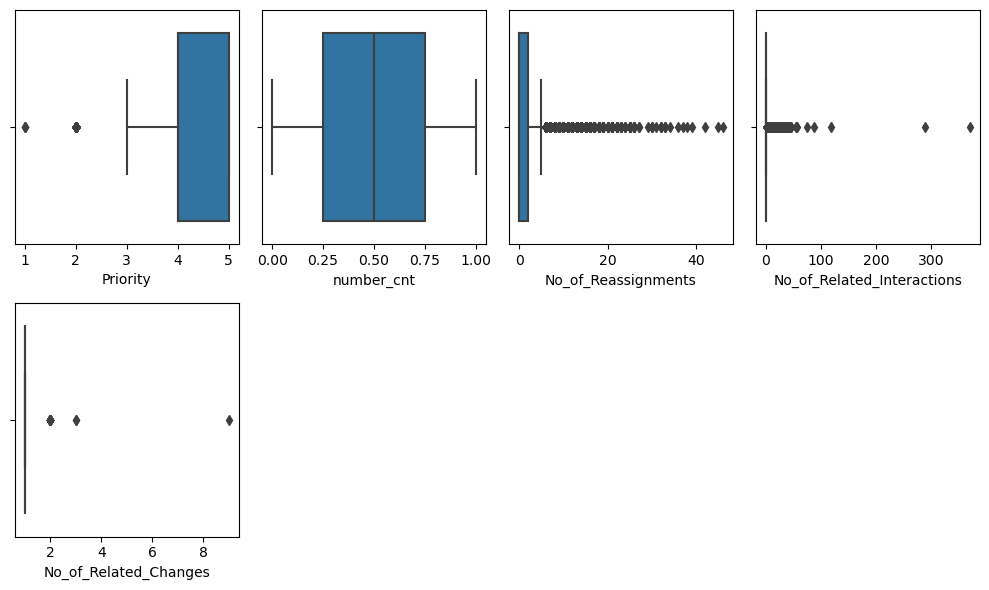

In [1679]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in num_data:
  if plotnumber<8:
    ax=plt.subplot(2,4,plotnumber)
    sns.boxplot(x=data[col])
    plt.xlabel(col,fontsize=10)

  plotnumber+=1
plt.tight_layout()

## Box Plot for No_of_Reassignments

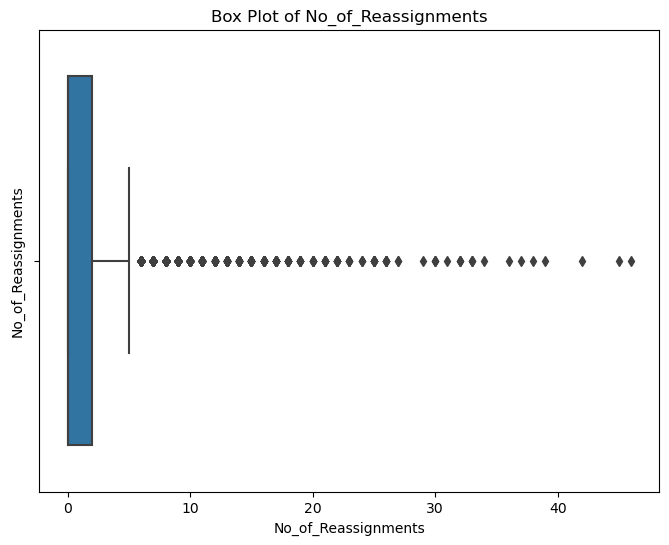

In [1680]:
# Create a box plot for the 'number_cnt' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['No_of_Reassignments'])
plt.title('Box Plot of No_of_Reassignments')
plt.ylabel('No_of_Reassignments')
plt.show()

In [1681]:
Q1=data["No_of_Reassignments"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Reassignments"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 0.0
upper_quartile 2.0


In [1682]:
IQR=Q3-Q1
IQR

2.0

In [1683]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is -3.0
upper_limit is 5.0


In [1684]:
data.loc[data["No_of_Reassignments"]>upper_limit,"No_of_Reassignments"]=data["No_of_Reassignments"].median()

<Axes: xlabel='No_of_Reassignments'>

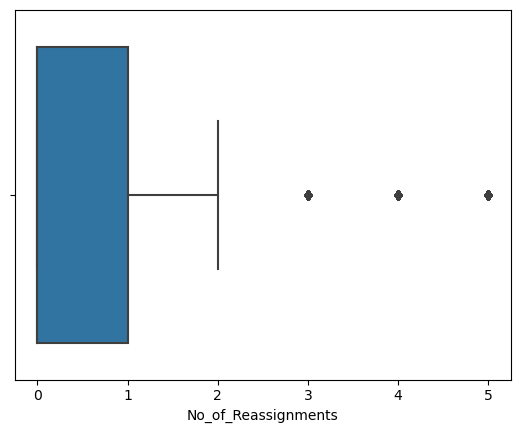

In [1685]:
sns.boxplot(x=data.No_of_Reassignments)

## Box Plot for No_of_Related_Interactions

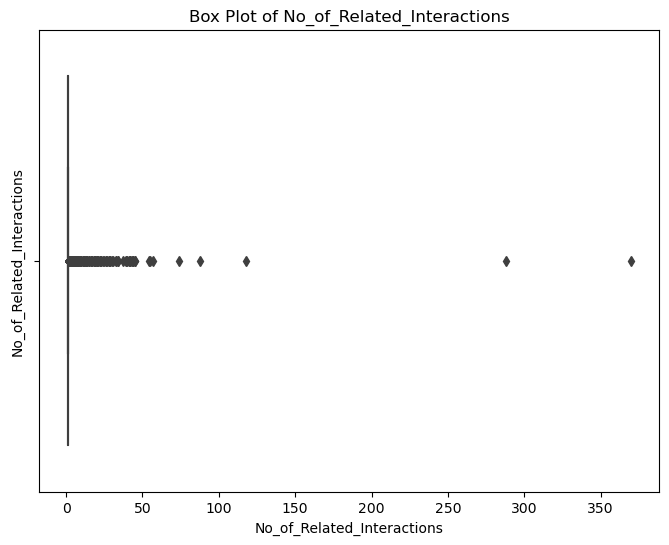

In [1686]:
# Create a box plot for the 'No_of_Related_Interactions' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['No_of_Related_Interactions'])
plt.title('Box Plot of No_of_Related_Interactions')
plt.ylabel('No_of_Related_Interactions')
plt.show()

In [1687]:
Q1 = data["No_of_Related_Interactions"].quantile(0.25)
print("lower_quantile",Q1)
Q3 = data["No_of_Related_Interactions"].quantile(0.75)
print("upper_quantile",Q3)

lower_quantile 1.0
upper_quantile 1.0


In [1688]:
IQR=Q3 - Q1
IQR

0.0

In [1689]:
lower_limit = Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit = Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 1.0


In [1690]:
data.loc[data["No_of_Related_Interactions"]>upper_limit,"No_of_Related_Interactions"]=data["No_of_Related_Interactions"].median()


<Axes: xlabel='No_of_Related_Interactions'>

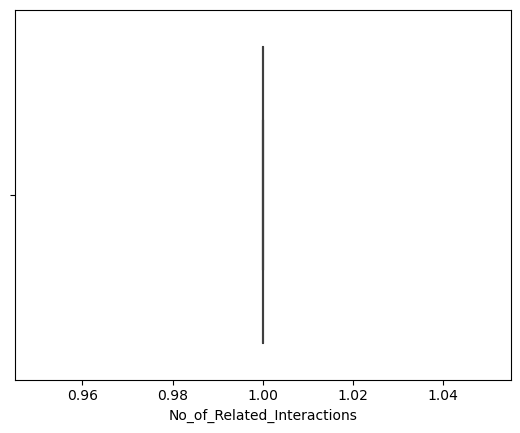

In [1691]:
sns.boxplot(x=data.No_of_Related_Interactions)

## Drop Unique And Feature

In [1692]:
data.drop(["number_cnt","WBS","KB_number","Incident_ID","CI_Name","Handle_Time_hrs"],axis=1,inplace=True)

## Change data types

In [1693]:
data['No_of_Reassignments']=data['No_of_Reassignments'].astype(int)
data['Priority']=data['Priority'].astype(int)
data['Urgency']=data['Urgency'].astype(int)
data['Impact']=data['Impact'].astype(int)

In [1694]:
print(data["Resolved_Time"].isnull().sum())
print(data["Priority"].isnull().sum())
print(data["Closure_Code"].isnull().sum())
print(data.No_of_Related_Interactions.isnull().sum())
print(data.CI_Cat.isnull().sum())
print(data.CI_Subcat.isnull().sum())
print(data.No_of_Reassignments.isnull().sum())

0
0
0
0
0
0
0


In [1695]:
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=["Missing_Value","Missing_Percentage"])
    return null_value
missing_value(data)

,Missing_Value,Missing_Percentage
CI_Cat,0,0.0
CI_Subcat,0,0.0
Status,0,0.0
Impact,0,0.0
Urgency,0,0.0
Priority,0,0.0
Category,0,0.0
Alert_Status,0,0.0
No_of_Reassignments,0,0.0
Open_Time,0,0.0


* The missing values have been addressed as follows:

   1) Columns with a high percentage of missing values have been dropped.
   2) Missing values in 'Resolved_Time' were imputed with the median.
   3) Missing values in 'Priority' were imputed with the mode.
   4) Missing values in 'Handle_Time_hrs' were imputed with the median.
   5) Missing values in 'Closure_Code' were imputed with the mode.
   6) Rows with missing values in columns with very few missing values ('No_of_Related_Interactions', 'CI_Cat', 'CI_Subcat',           'No_of_Reassignments') have been removed.
* There are no remaining missing values in the dataset. The data is now clean and ready for further analysis or modeling.

## Insight

-we have compaletely filled out the missing values and changed the data types
* Priority,Resolved_Time,Closure_Code,CI_Cat,CI_Subcat,No_of_Related_Interactions,No_of_Reassignments,Impact fill the missing     value using Mode
* Handle_Time_hrs,No_of_Related_Incidents fill the missing value using Median
* Changed data types
* Deleted 2 columns

##  EXPLORATORY DATA ANALYSIS 

-Using EDA :Visualize fesatures, insight /observation from the data

## Univariate Analysis - Numerical Data

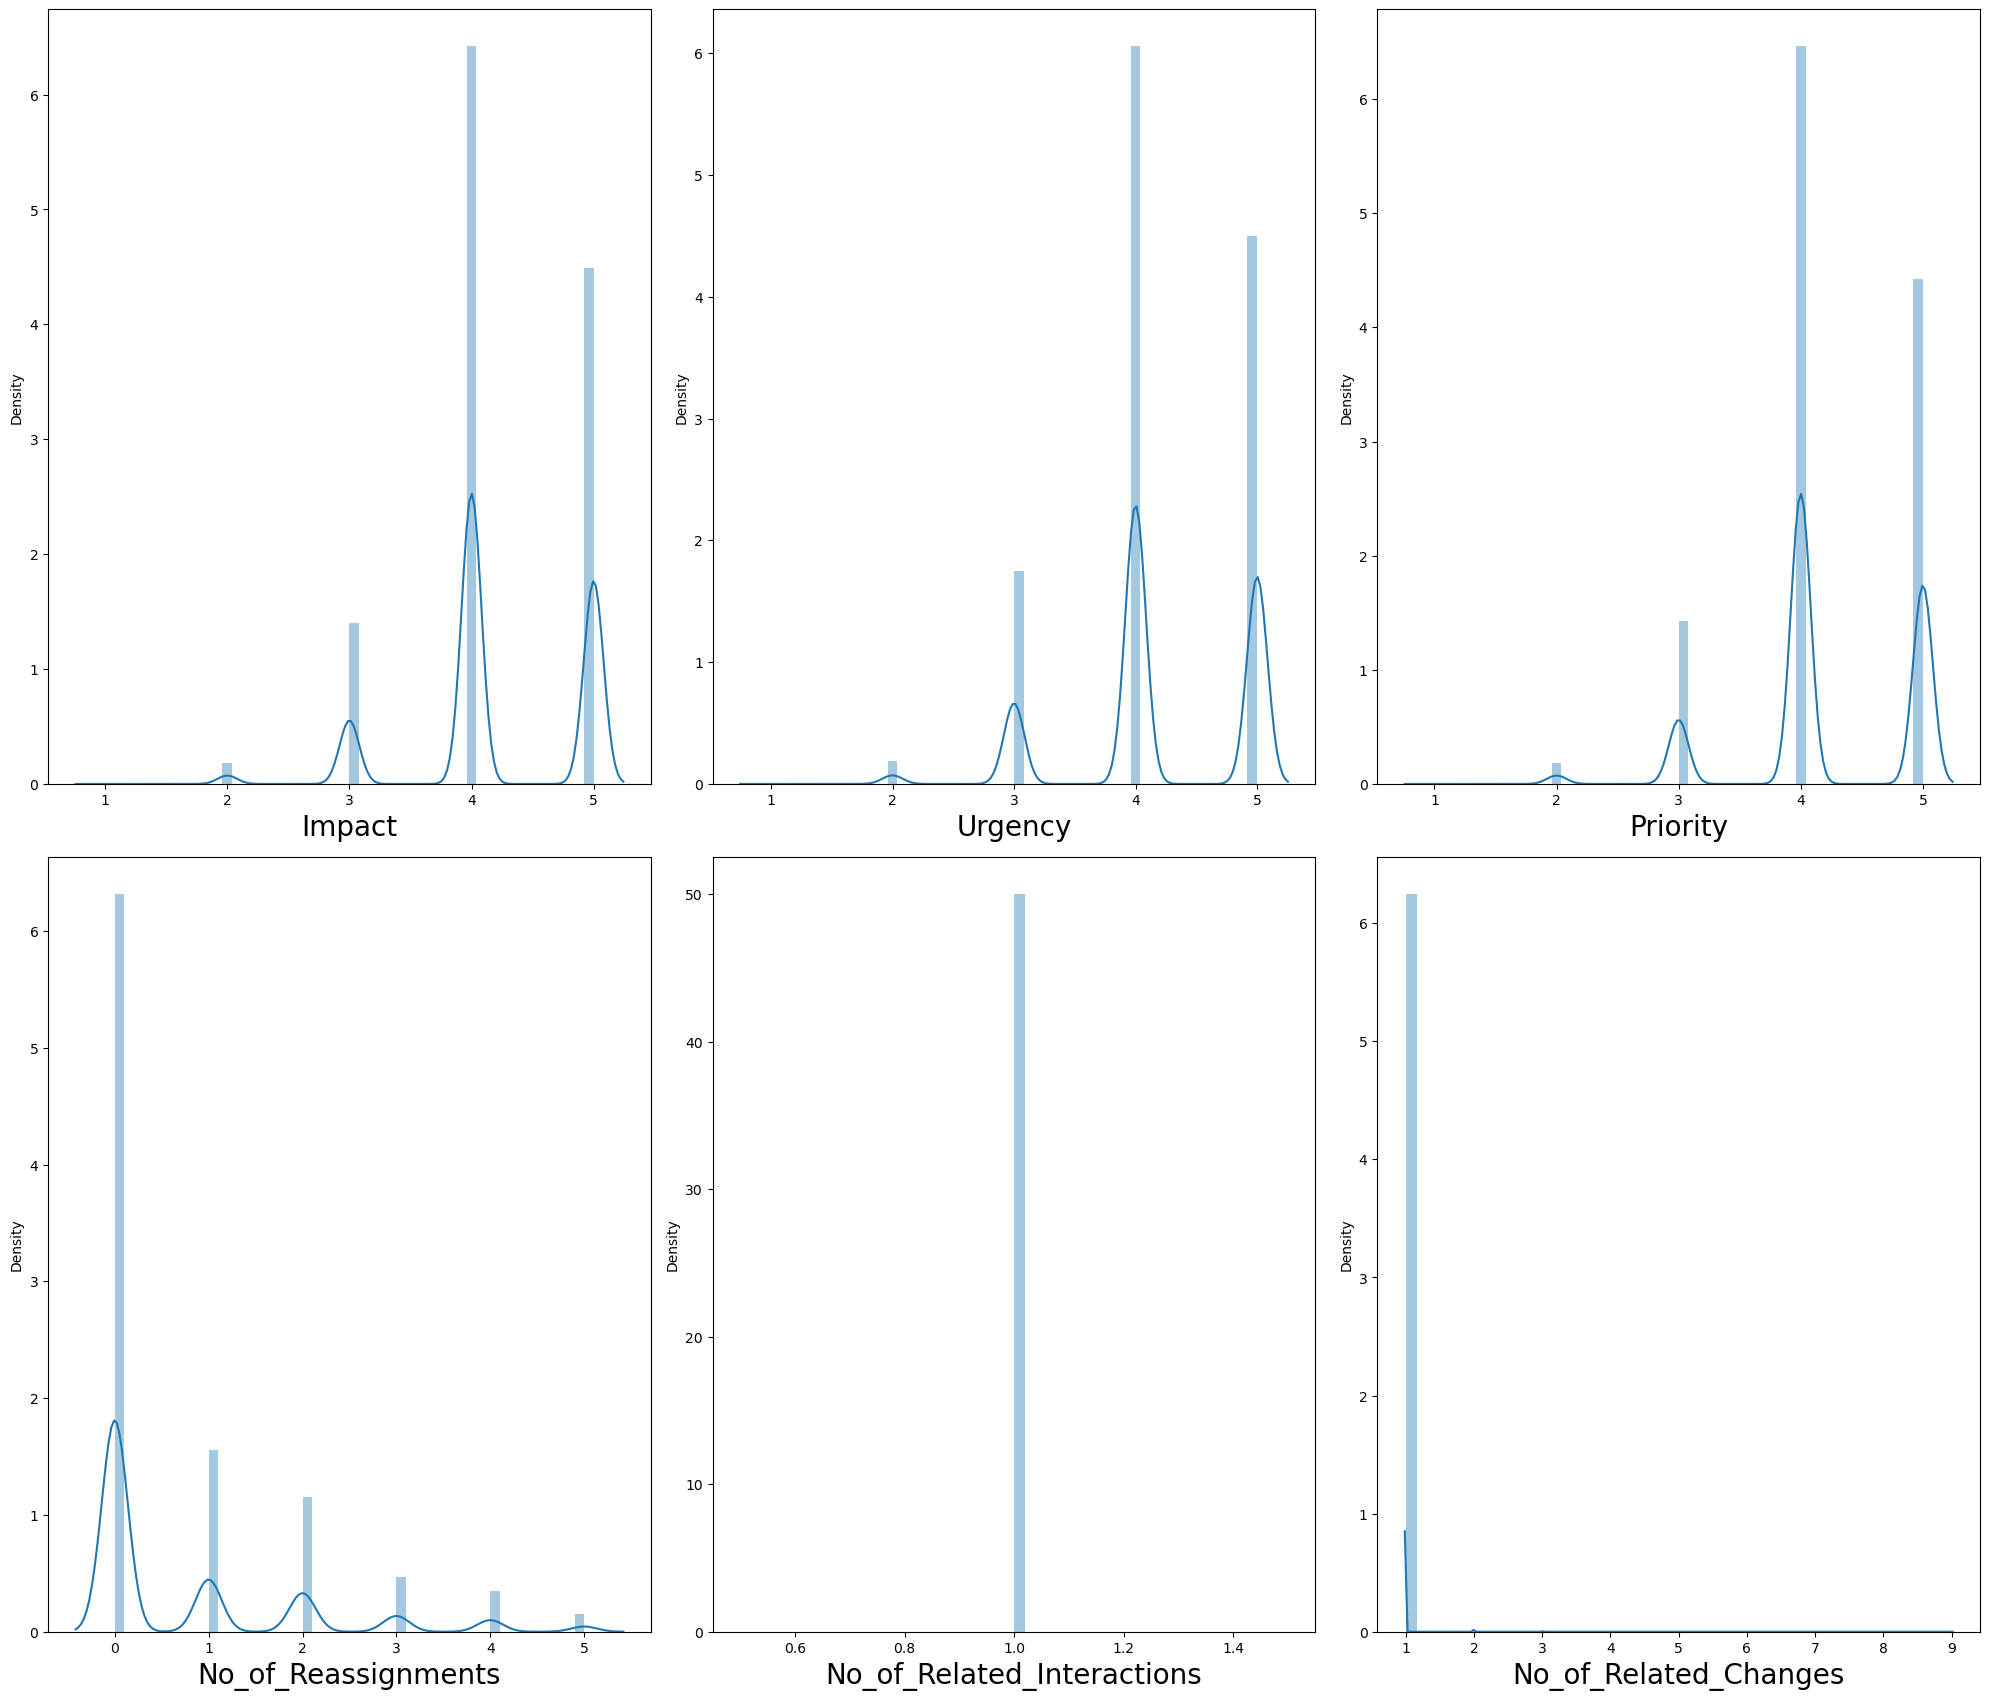

In [1696]:
feature_1 = data[['Impact','Urgency', 'Priority', 'No_of_Reassignments', 'No_of_Related_Interactions','No_of_Related_Changes']]
plt.figure(figsize=(20,25)) 
plot1=1
for column in feature_1:
    if plot1<=9:    
        plt.subplot(3,3,plot1) 
        sns.distplot(x=feature_1[column])
        plt.xlabel(column,fontsize=20)
    plot1+=1
plt.tight_layout()
plt.show()

### Visualizing the categorical columns

In [1697]:
categorical_columns=data[["Status","Impact","Urgency","Priority","Category","Alert_Status"]]

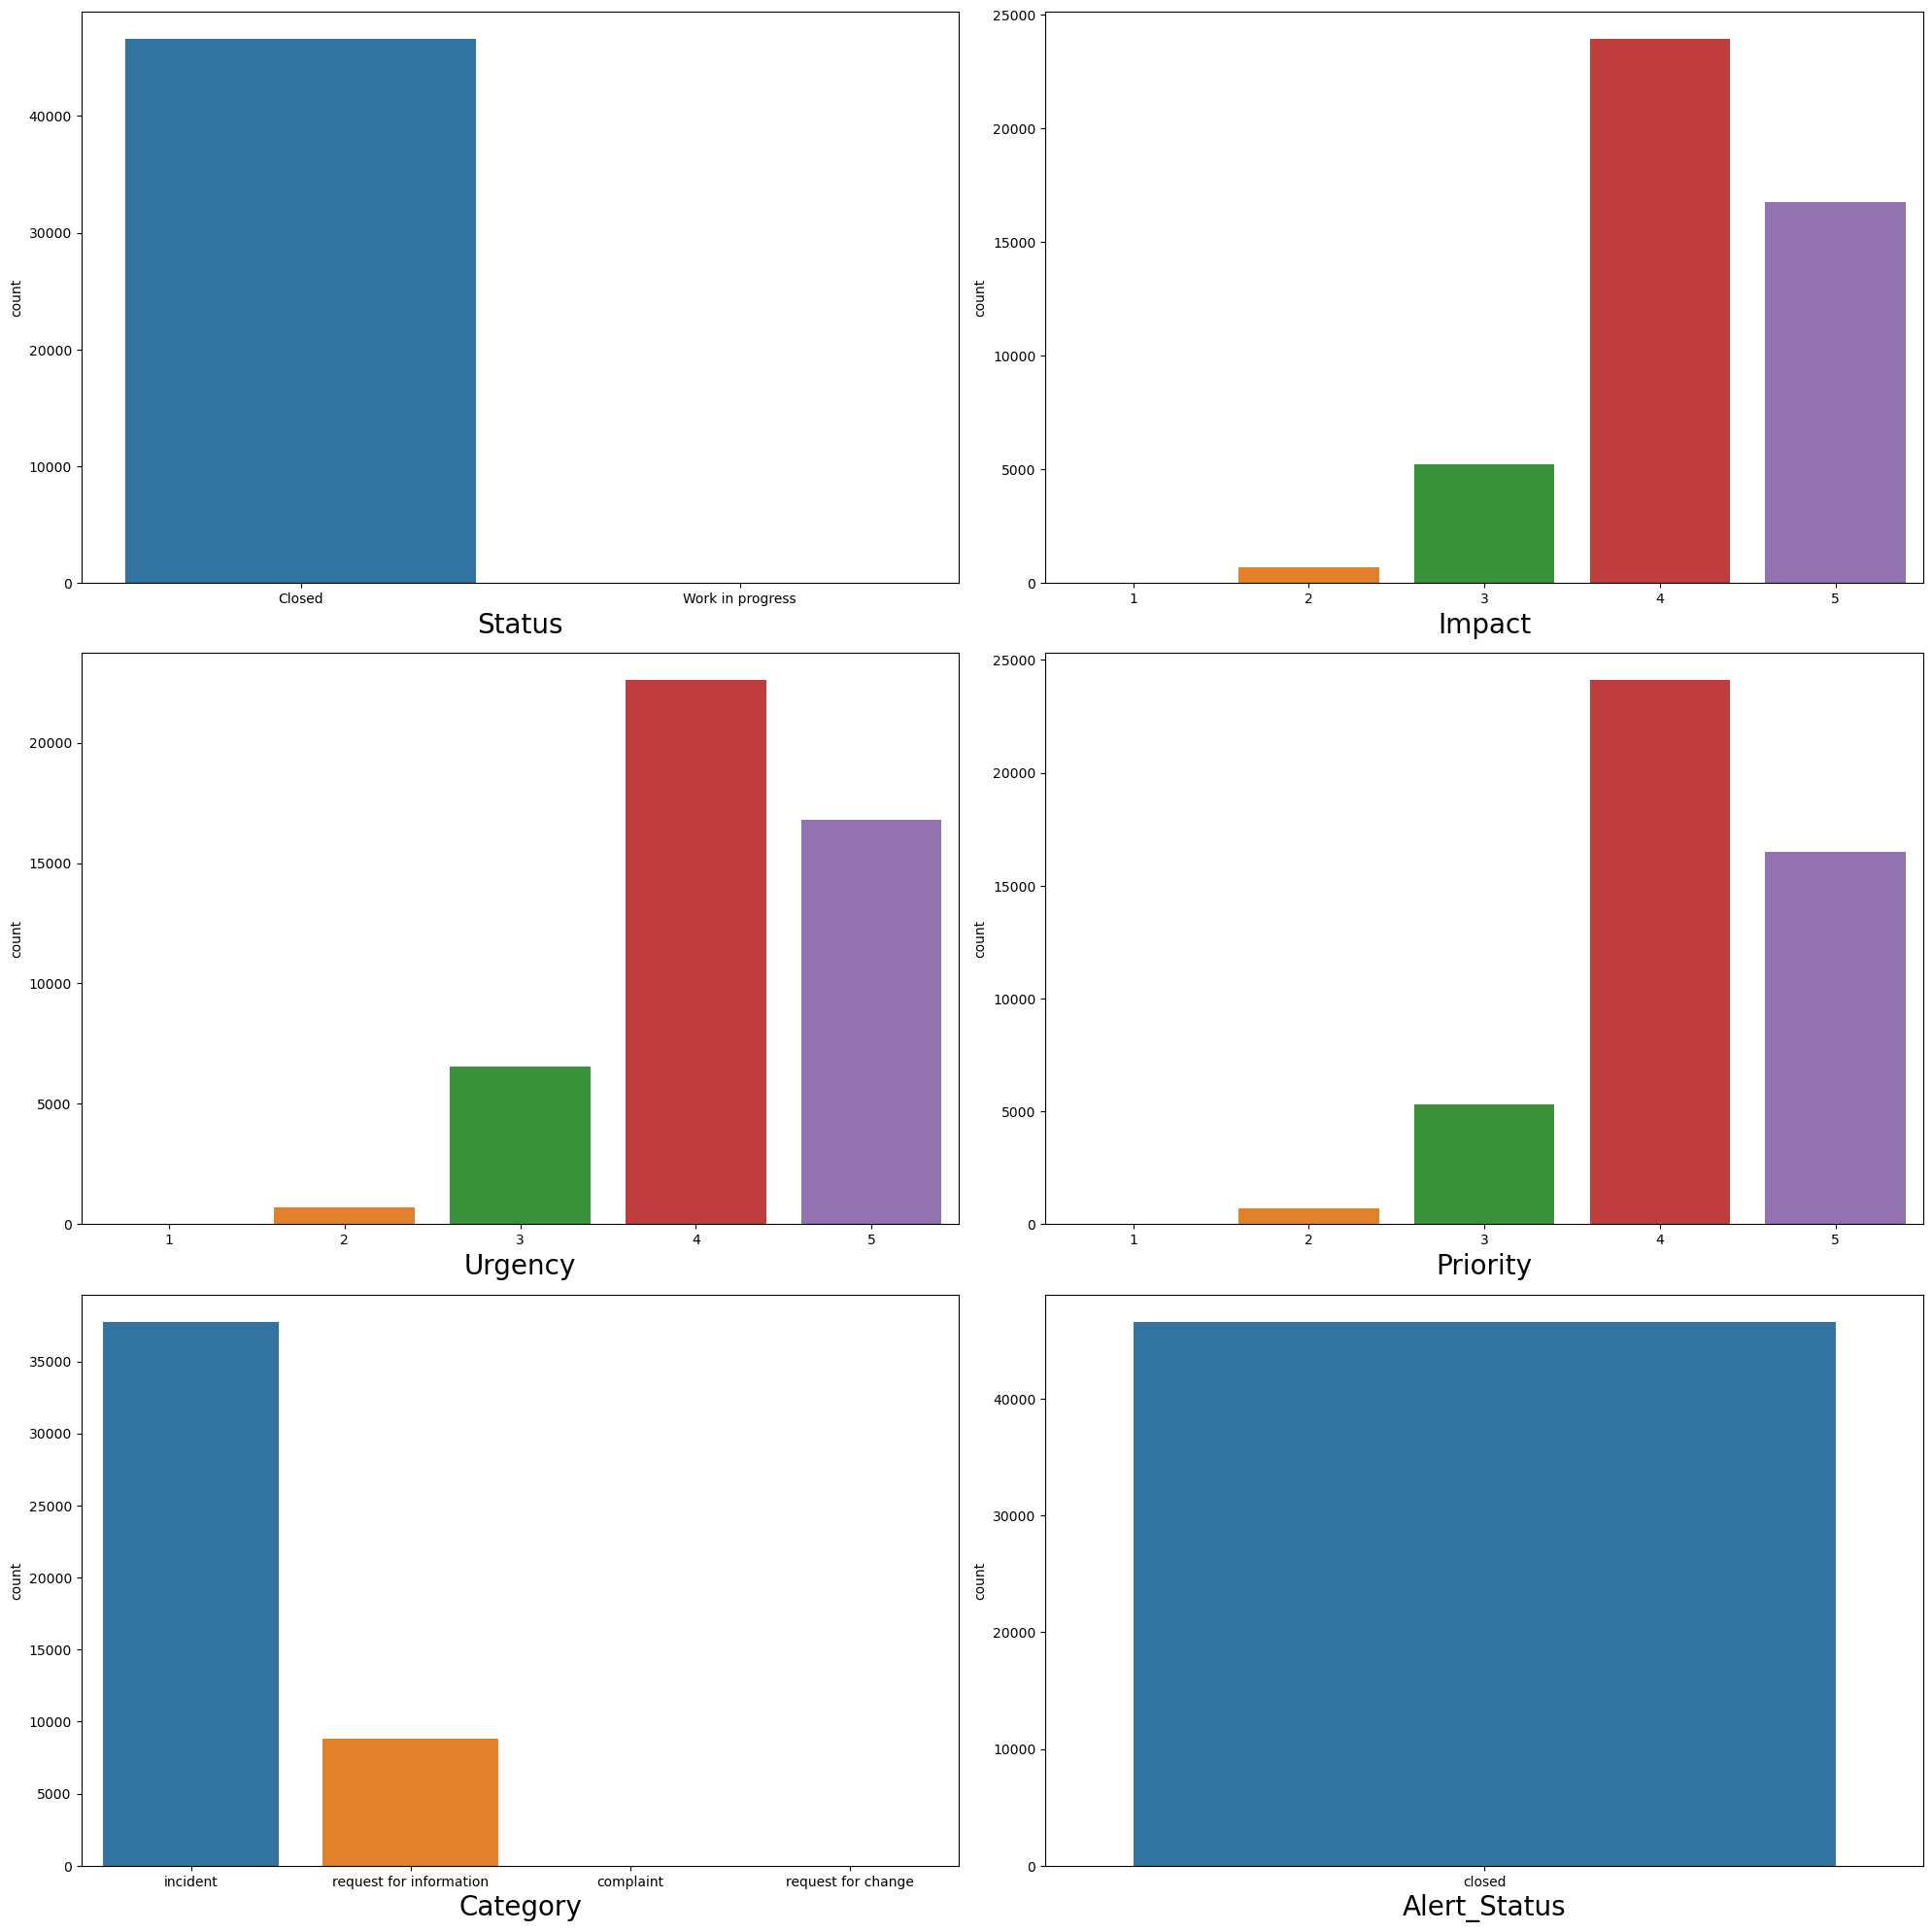

In [1698]:
plt.figure(figsize=(20,20))
plotn=1
for column in categorical_columns:
    if plotn<7:
        plt.subplot(3,2,plotn)
        sns.countplot(x=categorical_columns[column])
        plt.xlabel(column,fontsize=20)
    plotn+=1
plt.tight_layout()
plt.show()

## Bivariate Analysis

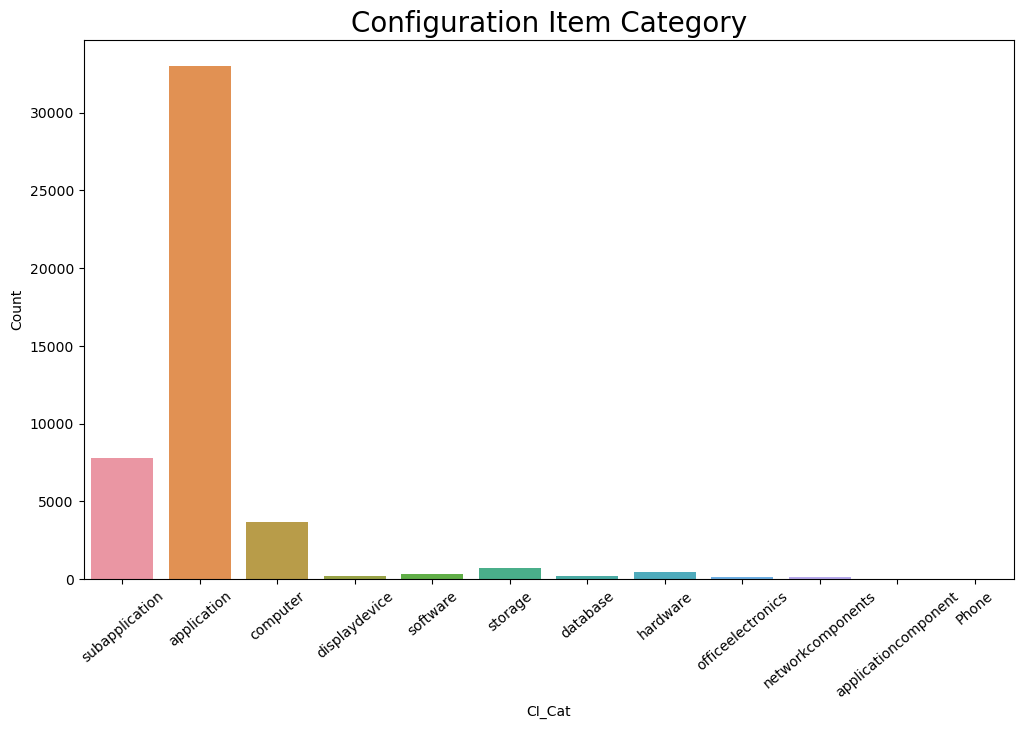

In [1699]:
plt.figure(figsize=(12,7))
sns.countplot(x="CI_Cat",data=data)
plt.xlabel("CI_Cat")
plt.ylabel("Count")
plt.title("Configuration Item Category", fontsize = 20)
plt.xticks(rotation=40)
plt.show()

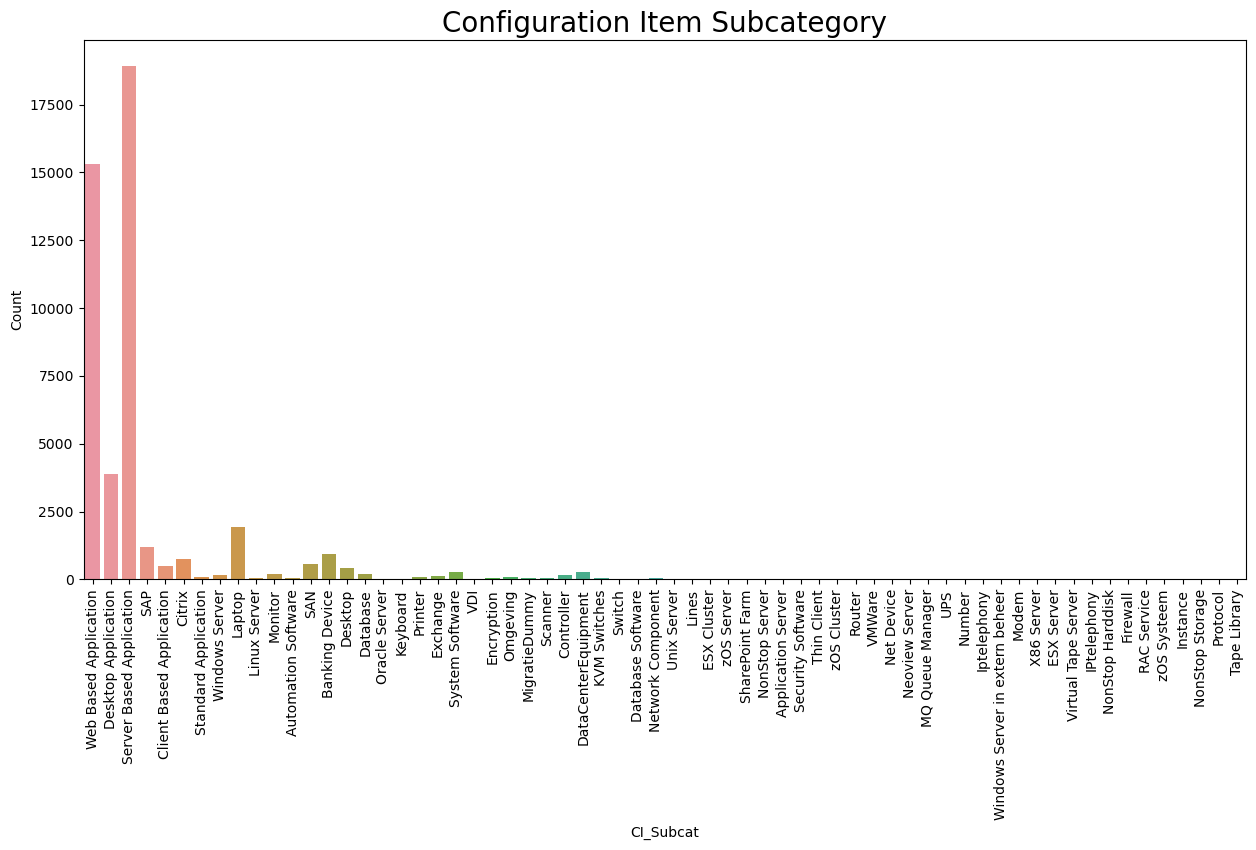

In [1700]:
plt.figure(figsize=(15,7))
sns.countplot(x="CI_Subcat",data=data)
plt.xlabel("CI_Subcat")
plt.ylabel("Count")
plt.title("Configuration Item Subcategory", fontsize = 20)
plt.xticks(rotation=90)
plt.show()

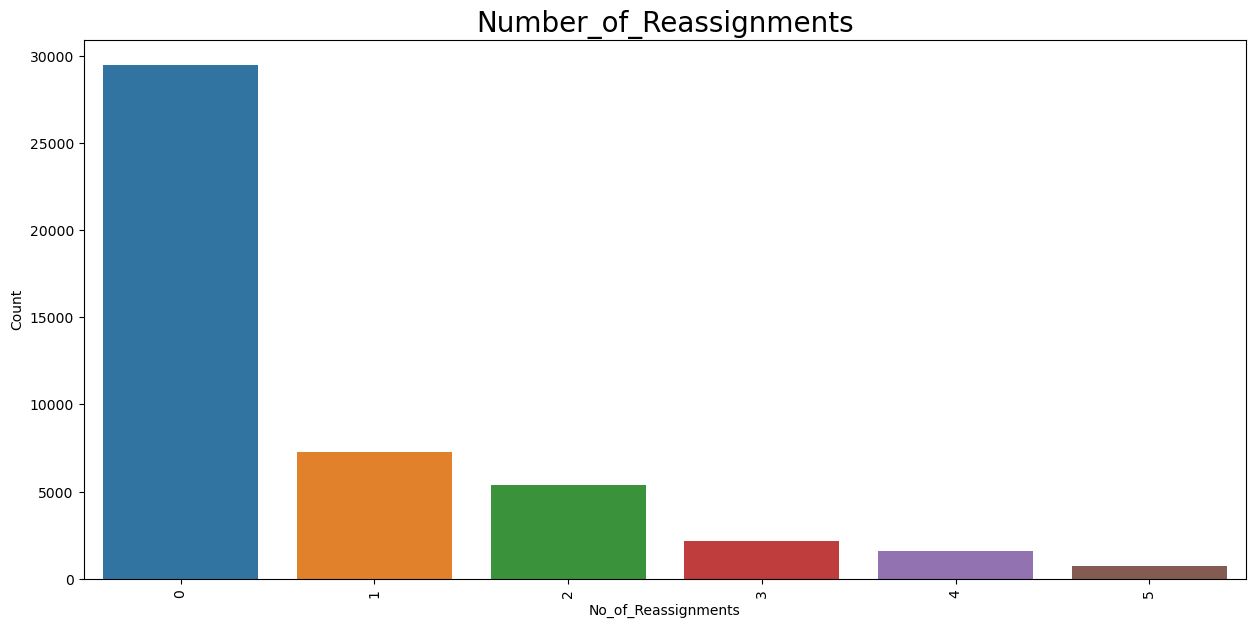

In [1701]:
plt.figure(figsize=(15,7))
sns.countplot(x="No_of_Reassignments",data=data)
plt.xlabel("No_of_Reassignments")
plt.ylabel("Count")
plt.title("Number_of_Reassignments", fontsize = 20)
plt.xticks(rotation=90)
plt.show()

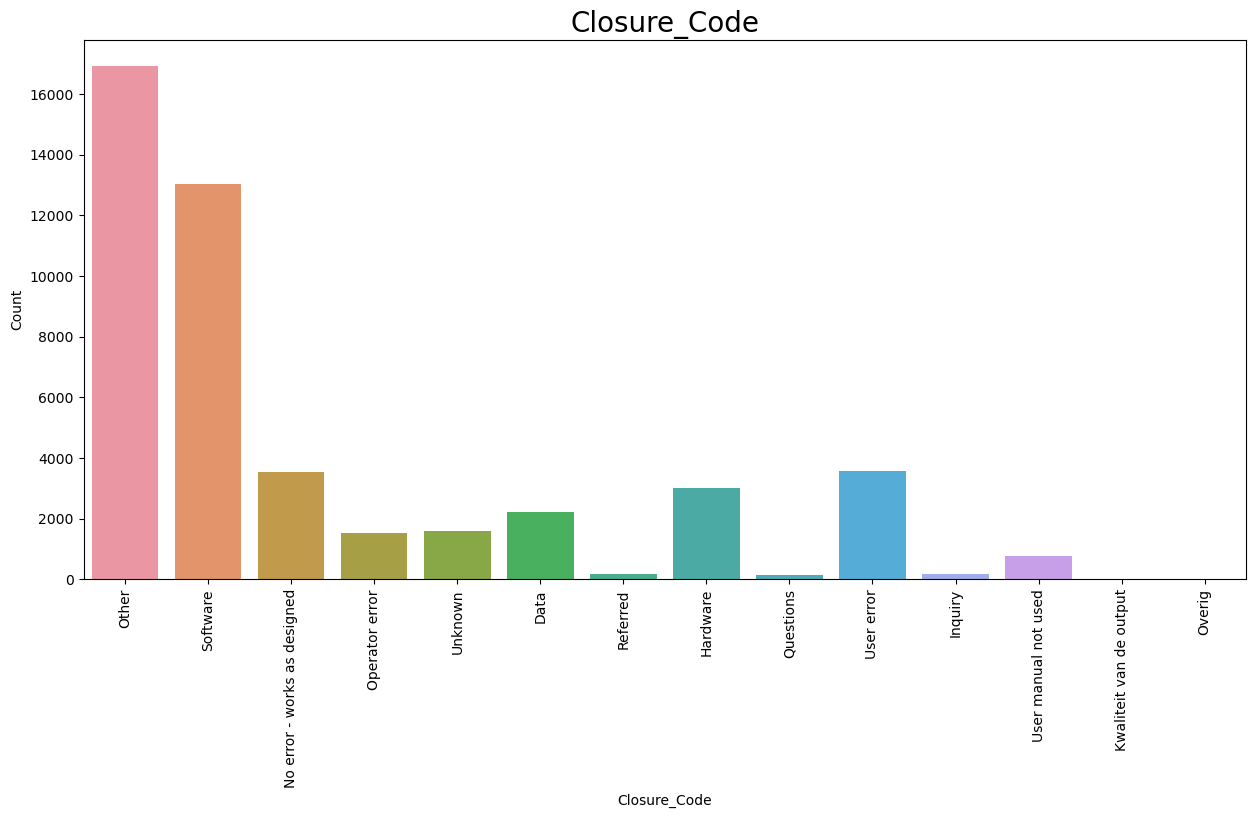

In [1702]:
plt.figure(figsize=(15,7))
sns.countplot(x="Closure_Code",data=data)
plt.xlabel("Closure_Code")
plt.ylabel("Count")
plt.title("Closure_Code", fontsize = 20)
plt.xticks(rotation=90)
plt.show()

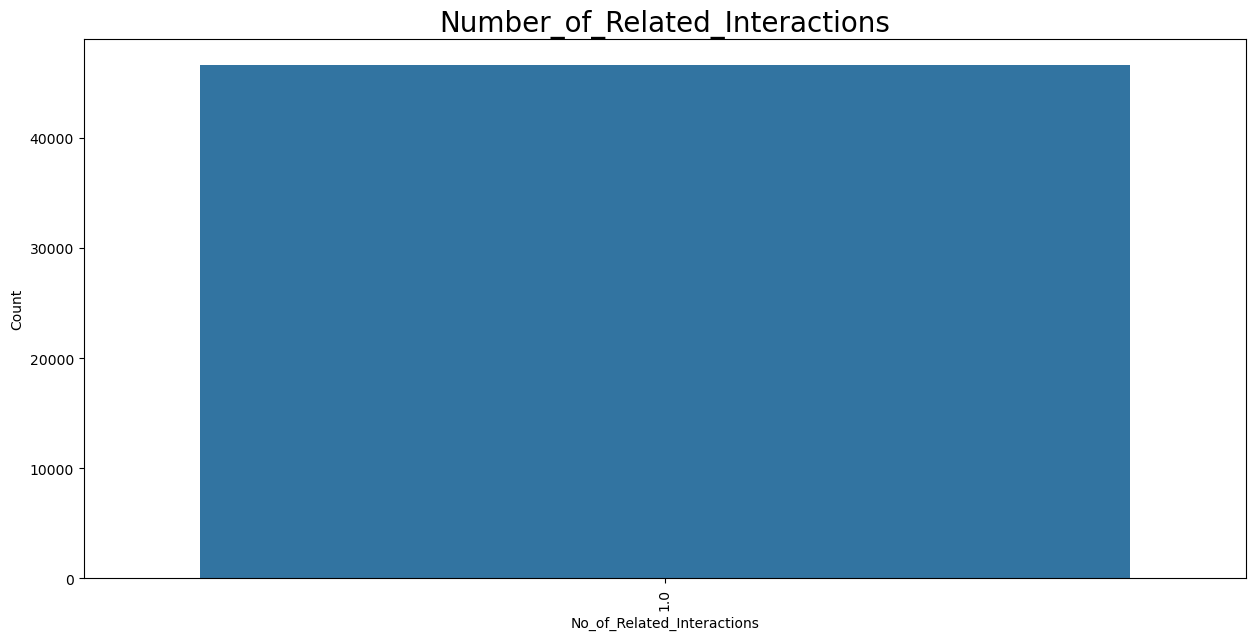

In [1703]:
plt.figure(figsize=(15,7))
sns.countplot(x="No_of_Related_Interactions",data=data)
plt.xlabel("No_of_Related_Interactions")
plt.ylabel("Count")
plt.title("Number_of_Related_Interactions", fontsize = 20)
plt.xticks(rotation=90)
plt.show()

## FEATURE ENGINEERING

In [1704]:
# Label encoding using scikit-learn
label = LabelEncoder()
data["CI_Cat"] = label.fit_transform(data['CI_Cat'])
data["CI_Subcat"] = label.fit_transform(data['CI_Subcat'])
data["Status"] = label.fit_transform(data['Status'])
data["Category"] = label.fit_transform(data['Category'])
data["Closure_Code"] = label.fit_transform(data['Closure_Code'])
data["Impact"] = label.fit_transform(data['Impact'])
data["Urgency"] = label.fit_transform(data['Urgency'])
data["Alert_Status"] = label.fit_transform(data['Alert_Status'])
data["No_of_Reassignments"] = label.fit_transform(data['No_of_Reassignments'])

In [1705]:
data["CI_Cat"].unique()

array([11,  1,  3,  5,  9, 10,  4,  6,  8,  7,  2,  0])

In [1706]:
data["CI_Subcat"].unique()

array([57, 10, 45, 42,  4,  3, 47, 58, 21, 23, 27,  1, 41,  2,  9,  7, 36,
       20, 37, 14, 49, 54, 13, 35, 25, 43,  5,  6, 19, 48,  8, 30, 53, 22,
       11, 62, 46, 32,  0, 44, 51, 61, 40, 55, 29, 28, 24, 52, 34, 18, 59,
       26, 60, 12, 56, 16, 31, 15, 39, 63, 17, 33, 38, 50])

In [1707]:
data["Status"].unique()

array([0, 1])

In [1708]:
data["Category"].unique()

array([1, 3, 0, 2])

In [1709]:
data["Closure_Code"].unique()

array([ 6, 10,  4,  5, 11,  0,  9,  1,  8, 12,  2, 13,  3,  7])

In [1710]:
data["Urgency"].unique()

array([3, 2, 4, 1, 0], dtype=int64)

In [1711]:
data["Impact"].unique()

array([3, 2, 4, 1, 0], dtype=int64)

In [1712]:
data.shape

(46605, 16)

## FEATURE SELECTION

#### 1.DROP UNIQUE AND CONSTANT FEATURE

In [1713]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Cat                      46605 non-null  int32         
 1   CI_Subcat                   46605 non-null  int32         
 2   Status                      46605 non-null  int32         
 3   Impact                      46605 non-null  int64         
 4   Urgency                     46605 non-null  int64         
 5   Priority                    46605 non-null  int32         
 6   Category                    46605 non-null  int32         
 7   Alert_Status                46605 non-null  int32         
 8   No_of_Reassignments         46605 non-null  int64         
 9   Open_Time                   46605 non-null  datetime64[ns]
 10  Resolved_Time               46605 non-null  datetime64[ns]
 11  Close_Time                  46605 non-null  datetime64[ns]


## Drop Constant Feature

In [1714]:
data.drop(["Status","Alert_Status","Related_Interaction"],axis=1,inplace=True)

In [1715]:
data.corr()

,CI_Cat,CI_Subcat,Impact,Urgency,Priority,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Changes
CI_Cat,1.000000,0.199088,-0.053631,-0.048209,-0.051441,-0.105496,-0.094444,0.032588,0.030190,0.024506,-0.042232,NaN,0.003698
CI_Subcat,0.199088,1.000000,0.073395,0.095685,0.082222,0.030186,-0.005905,0.023106,0.080257,0.040633,0.104605,NaN,0.009196
Impact,-0.053631,0.073395,1.000000,0.953838,0.991777,0.478703,0.092696,-0.026812,0.040302,-0.014506,-0.091791,NaN,-0.007704
Urgency,-0.048209,0.095685,0.953838,1.000000,0.962713,0.470558,0.093826,-0.030434,0.038956,-0.018398,-0.089862,NaN,-0.007460
Priority,-0.051441,0.082222,0.991777,0.962713,1.000000,0.476697,0.093408,-0.026469,0.041316,-0.014475,-0.092087,NaN,-0.007530
Category,-0.105496,0.030186,0.478703,0.470558,0.476697,1.000000,0.095214,-0.050170,-0.029736,-0.048306,-0.144761,NaN,-0.006441
No_of_Reassignments,-0.094444,-0.005905,0.092696,0.093826,0.093408,0.095214,1.000000,-0.058200,-0.000087,-0.007124,-0.083159,NaN,0.013466
Open_Time,0.032588,0.023106,-0.026812,-0.030434,-0.026469,-0.050170,-0.058200,1.000000,0.888686,0.941972,0.017386,NaN,-0.005813
Resolved_Time,0.030190,0.080257,0.040302,0.038956,0.041316,-0.029736,-0.000087,0.888686,1.000000,0.945754,-0.004696,NaN,0.003977
Close_Time,0.024506,0.040633,-0.014506,-0.018398,-0.014475,-0.048306,-0.007124,0.941972,0.945754,1.000000,0.008352,NaN,0.003195


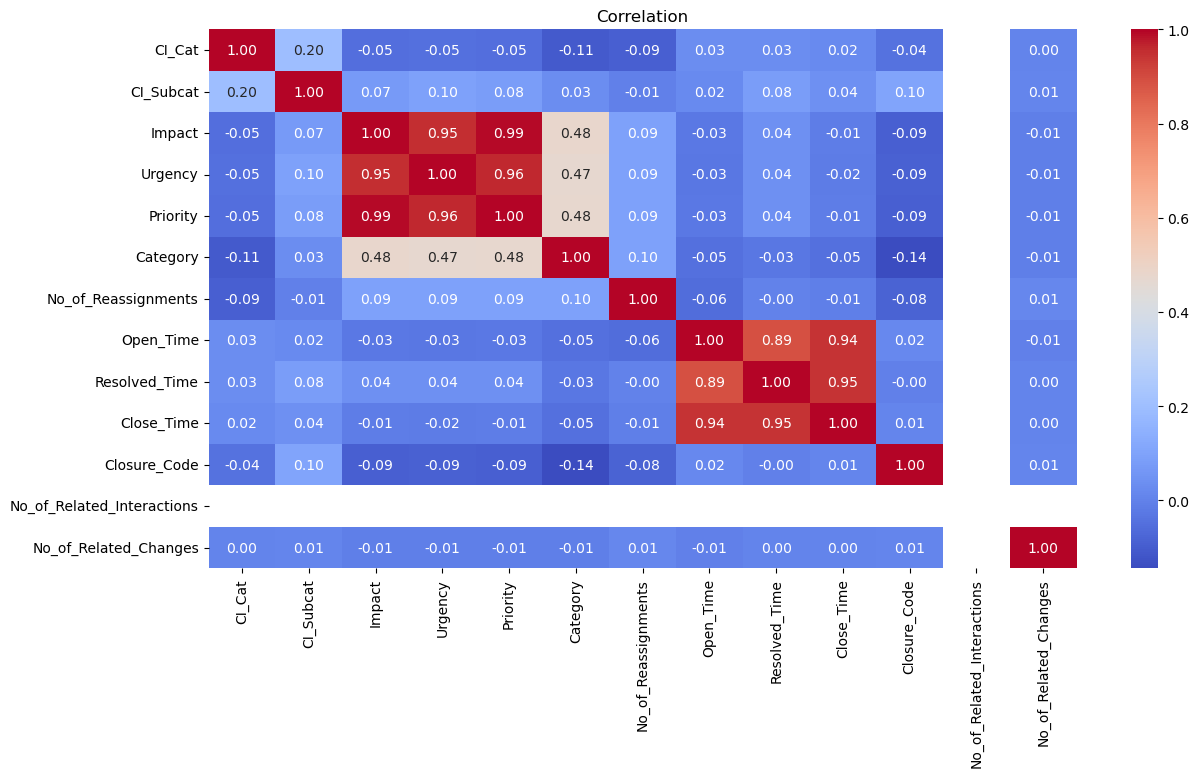

In [1716]:
# Create a correlation heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation')
plt.show()

## Drop Highly Correlated Feature

In [1717]:
data.drop(["Closure_Code","Category","Urgency","Resolved_Time","Open_Time","Close_Time"],axis=1,inplace=True)

In [1718]:
data.head(5)

,CI_Cat,CI_Subcat,Impact,Priority,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Changes
0,11,57,3,4,0,1.0,1.0
1,1,57,2,3,0,1.0,1.0
2,1,10,3,4,3,1.0,1.0
3,1,57,3,4,0,1.0,1.0
4,1,57,3,4,2,1.0,1.0


## MODEL EVALUATION 

## Task 1

### 1) Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.

In [1719]:
df=data.copy()

In [1720]:
x=df.drop(["Priority"],axis=1)

In [1721]:
x.head(5)

,CI_Cat,CI_Subcat,Impact,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Changes
0,11,57,3,0,1.0,1.0
1,1,57,2,0,1.0,1.0
2,1,10,3,3,1.0,1.0
3,1,57,3,0,1.0,1.0
4,1,57,3,2,1.0,1.0


In [1722]:
y=df["Priority"].map({1:1,2:1,3:2,4:2,5:2})

In [1723]:
y.value_counts()#Priority 1 and 2

Priority
2    45905
1      700
Name: count, dtype: int64

In [1724]:
data.Priority.value_counts()

Priority
4    24097
5    16485
3     5323
2      697
1        3
Name: count, dtype: int64

In [1725]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [1726]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37284, 6)
(9321, 6)
(37284,)
(9321,)


In [1727]:
from sklearn.preprocessing import StandardScaler

In [1728]:
# Standardize features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

## MODEL EVALUATION

## Logistic Regression

In [1729]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [1730]:
Prediction_of_testdata=model.predict(X_test_scaled)#Test Prediction
x_train_pred=model.predict(X_train_scaled)#Tranning Prediction

In [1731]:
print("Test Accuracy : " ,accuracy_score(y_test,Prediction_of_testdata))#Test Acuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_pred))#Tranning Accuracy

Test Accuracy :  0.9998927153738869
Traning Accuracy :  0.9998927153738869


LogisticRegression Accuracy Score:  0.9998927153738869
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       165
           2       1.00      1.00      1.00      9156

    accuracy                           1.00      9321
   macro avg       1.00      1.00      1.00      9321
weighted avg       1.00      1.00      1.00      9321



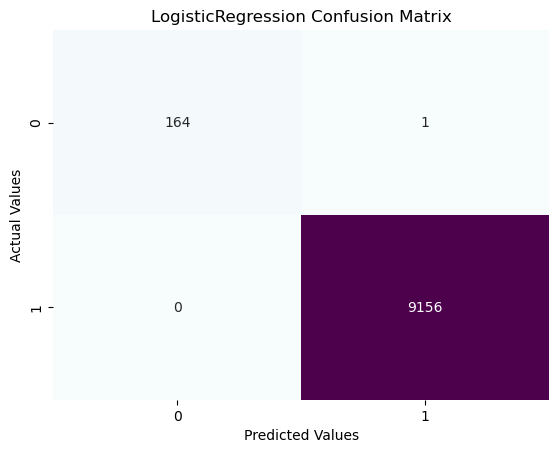

In [1732]:
def my_confusion_matrix(y_test, Prediction_of_testdata, plt_title):
    cm=confusion_matrix(y_test, Prediction_of_testdata)
    print(classification_report(y_test, Prediction_of_testdata))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print('LogisticRegression Accuracy Score: ',accuracy_score(y_test,Prediction_of_testdata))
cm_rfc=my_confusion_matrix(y_test, Prediction_of_testdata, 'LogisticRegression Confusion Matrix')

## Naive Bayes

In [1733]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [1734]:
y_pred_gnb=gnb.predict(X_test_scaled)#Test Prediction
x_train_preGNB=gnb.predict(X_train_scaled)#Traning Prediction

In [1735]:
print("Test Accuracy : " ,accuracy_score(y_test,y_pred_gnb))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preGNB))#Traning accuracy

Test Accuracy :  0.998712584486643
Traning Accuracy :  0.9989539748953975


 Naive Bayes Accuracy Score:  0.998712584486643
              precision    recall  f1-score   support

           1       1.00      0.93      0.96       165
           2       1.00      1.00      1.00      9156

    accuracy                           1.00      9321
   macro avg       1.00      0.96      0.98      9321
weighted avg       1.00      1.00      1.00      9321



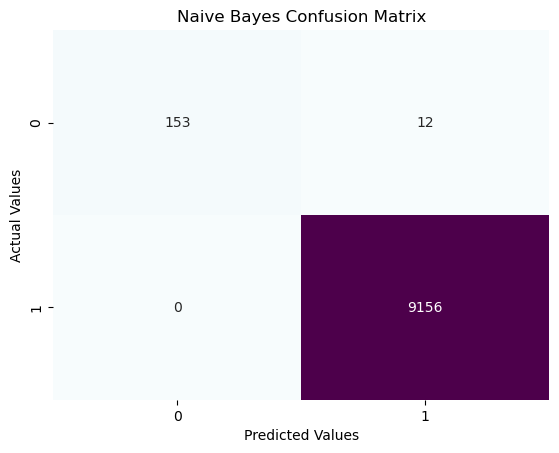

In [1736]:
def my_confusion_matrix(y_test, y_pred_gnb, plt_title):
    cm=confusion_matrix(y_test, y_pred_gnb)
    print(classification_report(y_test, y_pred_gnb))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' Naive Bayes Accuracy Score: ',accuracy_score(y_test,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_test, y_pred_gnb, 'Naive Bayes Confusion Matrix')

## KNN Classifier

In [1737]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [1738]:
y_pred_knn=knn.predict(X_test_scaled)#Test prediction
x_train_preKNN=knn.predict(X_train_scaled)#Traning Prediction

In [1739]:
print("Test Accuracy : " ,accuracy_score(y_test,y_pred_knn))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preKNN))#Traning Accuracy

Test Accuracy :  0.9998927153738869
Traning Accuracy :  0.9997854307477738


 KNN Classifier Accuracy Score:  0.9998927153738869
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       165
           2       1.00      1.00      1.00      9156

    accuracy                           1.00      9321
   macro avg       1.00      1.00      1.00      9321
weighted avg       1.00      1.00      1.00      9321



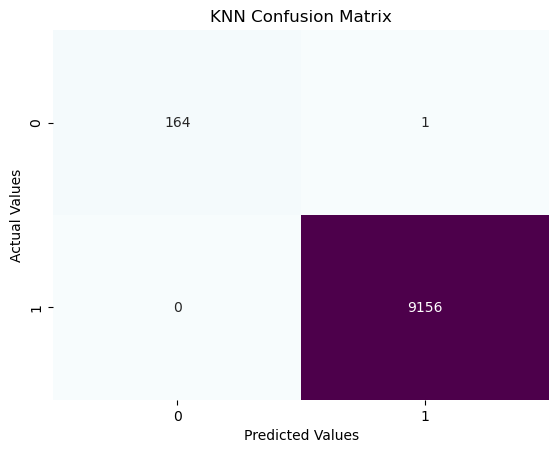

In [1740]:
def my_confusion_matrix(y_test, y_pred_knn, plt_title):
    cm=confusion_matrix(y_test, y_pred_knn)
    print(classification_report(y_test, y_pred_knn))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' KNN Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_knn))
cm_rfc=my_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

## SVM Classifier

In [1741]:
from sklearn import svm
svm_clf = svm.SVC(kernel='rbf',C=10,gamma=0.1)
svm_clf.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.1)

In [1742]:
y_pred_svm=svm_clf.predict(X_test_scaled)#Test Prediction
x_train_preSVM=svm_clf.predict(X_train_scaled)#Traning Prediction

In [1743]:
print("Test Accuracy : " ,accuracy_score(y_test,y_pred_svm))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preSVM))#Traning Accuracy

Test Accuracy :  0.9998927153738869
Traning Accuracy :  0.9998927153738869


 SVM Classifier Accuracy Score:  0.9998927153738869
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       165
           2       1.00      1.00      1.00      9156

    accuracy                           1.00      9321
   macro avg       1.00      1.00      1.00      9321
weighted avg       1.00      1.00      1.00      9321



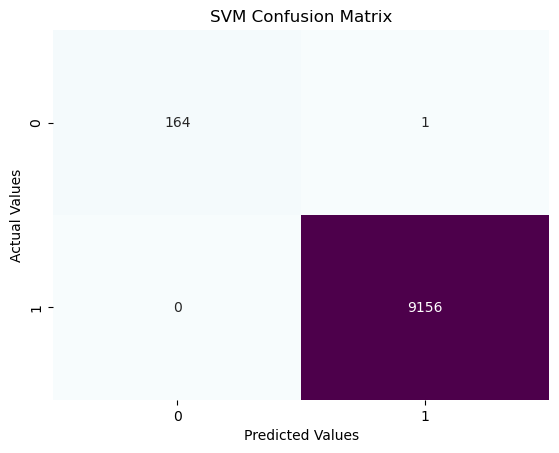

In [1744]:
def my_confusion_matrix(y_test, y_pred_svm, plt_title):
    cm=confusion_matrix(y_test, y_pred_svm)
    print(classification_report(y_test, y_pred_svm))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' SVM Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_svm))
cm_rfc=my_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

## Decision Tree Classifier

In [1745]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=1,min_samples_split=30,splitter="random")#object creation for decision tree  
dt.fit(X_train_scaled,y_train)#training the model

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=30,
                       splitter='random')

In [1746]:
Prediction_of_DT=dt.predict(X_test_scaled)#Test Prediction
x_train_preDT=dt.predict(X_train_scaled)#Traning Prediction

In [1747]:
print("Test Accuracy : " ,accuracy_score(y_test,Prediction_of_DT))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preDT))#Traning Accuracy

Test Accuracy :  0.9998927153738869
Traning Accuracy :  0.9998927153738869


 DecisionTree Classifier Accuracy Score:  0.9998927153738869
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       165
           2       1.00      1.00      1.00      9156

    accuracy                           1.00      9321
   macro avg       1.00      1.00      1.00      9321
weighted avg       1.00      1.00      1.00      9321



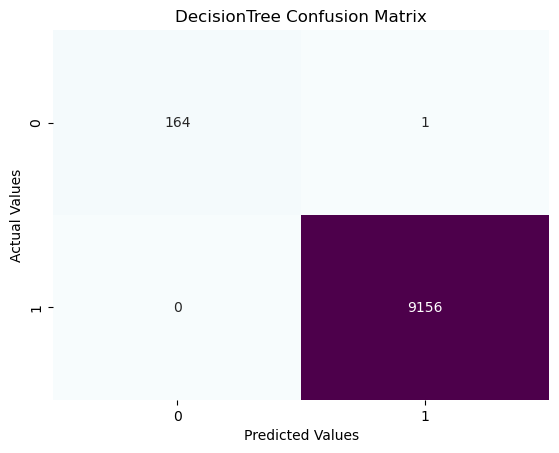

In [1748]:
def my_confusion_matrix(y_test, Prediction_of_DT, plt_title):
    cm=confusion_matrix(y_test, Prediction_of_DT)
    print(classification_report(y_test, Prediction_of_DT))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' DecisionTree Classifier Accuracy Score: ',accuracy_score(y_test,Prediction_of_DT))
cm_rfc=my_confusion_matrix(y_test, Prediction_of_DT, 'DecisionTree Confusion Matrix')

# Use Ensemble Techniques

## Random Forest Classifier

In [1749]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,max_depth= 7,max_features= 15,min_samples_leaf= 3,min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [1750]:
#Now, we do the training and prediction.
rfc.fit(X_train_scaled, y_train)
y_pred_rfc=rfc.predict(X_test_scaled)#Test prediction 
x_train_preRFC=rfc.predict(X_train_scaled)#Traning Prediction

In [1751]:
print("Test Accuracy : " ,accuracy_score(y_test,y_pred_rfc))#Test accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preRFC))#Traning accuracy

Test Accuracy :  0.9998927153738869
Traning Accuracy :  0.9998927153738869


 Random Forest Classifier Accuracy Score:  0.9998927153738869
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       165
           2       1.00      1.00      1.00      9156

    accuracy                           1.00      9321
   macro avg       1.00      1.00      1.00      9321
weighted avg       1.00      1.00      1.00      9321



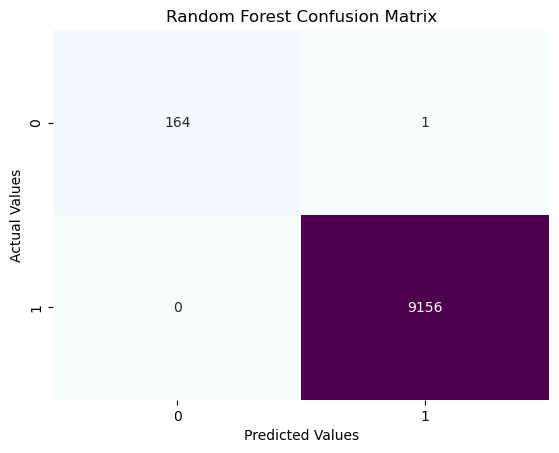

In [1752]:
def my_confusion_matrix(y_test, y_pred_rfc, plt_title):
    cm=confusion_matrix(y_test, y_pred_rfc)
    print(classification_report(y_test, y_pred_rfc))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_test, y_pred_rfc, 'Random Forest Confusion Matrix')

## GradientBoostingClassifier

In [1753]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a GradientBoostingClassifier object with some parameters
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [1754]:

# Fit the model to the training data
gbc.fit(X_train_scaled, y_train)

# Predict the labels of the test data
y_pred_GBC = gbc.predict(X_test_scaled)
x_train_preGBC = gbc.predict(X_train_scaled)

In [1755]:
print("Test Accuracy : " ,accuracy_score(y_test,y_pred_GBC))#Test accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preGBC))#Traning accuracy

Test Accuracy :  0.9998927153738869
Traning Accuracy :  0.9998927153738869


 Random Forest Classifier Accuracy Score:  0.9998927153738869
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       165
           2       1.00      1.00      1.00      9156

    accuracy                           1.00      9321
   macro avg       1.00      1.00      1.00      9321
weighted avg       1.00      1.00      1.00      9321



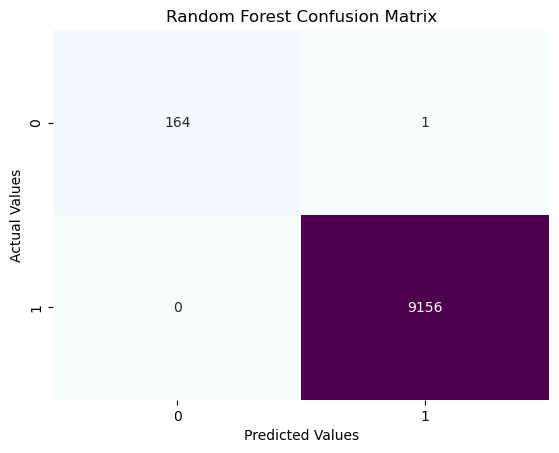

In [1756]:
def my_confusion_matrix(y_test, y_pred_GBC, plt_title):
    cm=confusion_matrix(y_test, y_pred_GBC)
    print(classification_report(y_test, y_pred_GBC))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_GBC))
cm_rfc=my_confusion_matrix(y_test, y_pred_GBC, 'Random Forest Confusion Matrix')

# Use Hyperparameter Tuning

## Logistic Regression - GridSearchCV

In [870]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [871]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1, 10]
}

In [151]:
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(best_params)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [152]:
Prediction_of_testdata1=grid_search.predict(X_test_scaled)#Test Prediction
x_train_L1=grid_search.predict(X_train_scaled)#Tranning Prediction

In [153]:
print("Test Accuracy : " ,accuracy_score(y_test,Prediction_of_testdata1))#Test Acuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_L1))#Tranning Accuracy

Test Accuracy :  0.9996781461216607
Traning Accuracy :  0.9998927153738869


LogisticRegression Accuracy Score:  0.9996781461216607
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       165
           2       1.00      1.00      1.00      9156

    accuracy                           1.00      9321
   macro avg       0.99      1.00      1.00      9321
weighted avg       1.00      1.00      1.00      9321



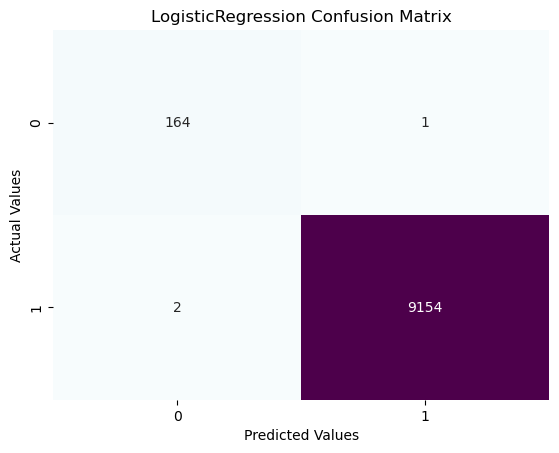

In [154]:
def my_confusion_matrix(y_test, Prediction_of_testdata1, plt_title):
    cm=confusion_matrix(y_test, Prediction_of_testdata1)
    print(classification_report(y_test, Prediction_of_testdata1))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print('LogisticRegression Accuracy Score: ',accuracy_score(y_test,Prediction_of_testdata1))
cm_rfc=my_confusion_matrix(y_test, Prediction_of_testdata1, 'LogisticRegression Confusion Matrix')

## Logistic Regression - RandomizedSearchCV

In [155]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': uniform(loc=0, scale=10)
}

model = LogisticRegression()
random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5)
random_search.fit(X_train_scaled, y_train)
best_params = random_search.best_params_

In [156]:
ran_X_test=random_search.predict(X_test_scaled)#Test Prediction
ran_x_train=random_search.predict(X_train_scaled)#Tranning Prediction

In [157]:
print("Test Accuracy : " ,accuracy_score(y_test,ran_X_test))#Test Acuracy
print("Traning Accuracy : ",accuracy_score(y_train,ran_x_train))#Tranning Accuracy

Test Accuracy :  0.9995708614955476
Traning Accuracy :  0.9998927153738869


LogisticRegression Accuracy Score:  0.9995708614955476
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       165
           2       1.00      1.00      1.00      9156

    accuracy                           1.00      9321
   macro avg       0.99      1.00      0.99      9321
weighted avg       1.00      1.00      1.00      9321



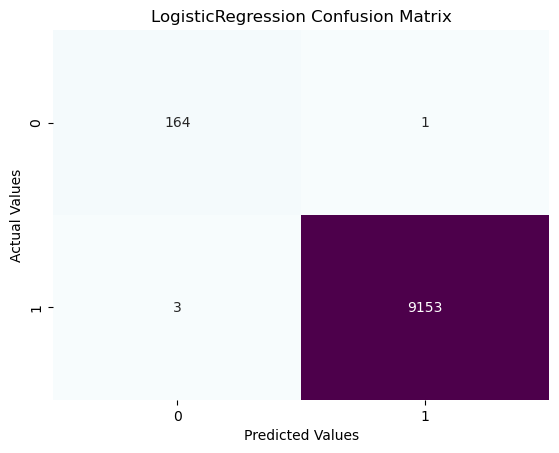

In [158]:
def my_confusion_matrix(y_test, ran_X_test, plt_title):
    cm=confusion_matrix(y_test, ran_X_test)
    print(classification_report(y_test, ran_X_test))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print('LogisticRegression Accuracy Score: ',accuracy_score(y_test,ran_X_test))
cm_rfc=my_confusion_matrix(y_test, ran_X_test, 'LogisticRegression Confusion Matrix')

## Naive Bayes - GridSearchCV

In [159]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 1, 10],
    'fit_prior': [True, False]
}

model = MultinomialNB()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

In [160]:
grid_X_test1=grid_search.predict(X_test_scaled)#Test Prediction
grid_x_train1=grid_search.predict(X_train_scaled)#Tranning Prediction

In [161]:
print("Test Accuracy : " ,accuracy_score(y_test,grid_X_test1))#Test Acuracy
print("Traning Accuracy : ",accuracy_score(y_train,grid_x_train1))#Tranning Accuracy

Test Accuracy :  0.9811179058040983
Traning Accuracy :  0.9839877695526231


LogisticRegression Accuracy Score:  0.9811179058040983
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       165
           2       1.00      1.00      1.00      9156

    accuracy                           1.00      9321
   macro avg       0.99      1.00      0.99      9321
weighted avg       1.00      1.00      1.00      9321



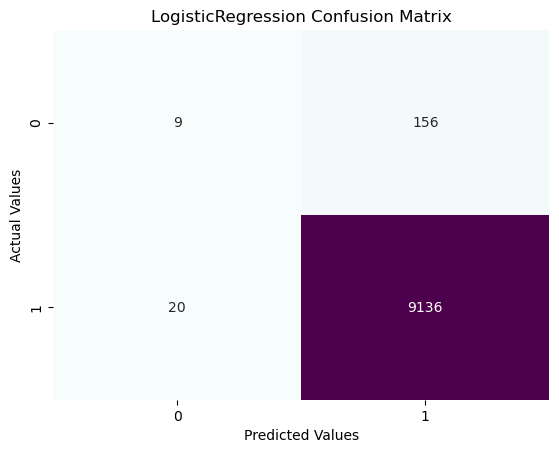

In [162]:
def my_confusion_matrix(y_test, grid_X_test1, plt_title):
    cm=confusion_matrix(y_test, grid_X_test1)
    print(classification_report(y_test, ran_X_test))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print('LogisticRegression Accuracy Score: ',accuracy_score(y_test,grid_X_test1))
cm_rfc=my_confusion_matrix(y_test, grid_X_test1, 'LogisticRegression Confusion Matrix')

## Naive Bayes - RandomizedSearchCV

In [163]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {
    'alpha': uniform(loc=0, scale=10)  # Define a range of alpha values
}

model = MultinomialNB()
random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_

In [164]:
ran_X_test1=random_search.predict(X_test_scaled)#Test Prediction
ran_x_train1=random_search.predict(X_train_scaled)#Tranning Prediction

In [165]:
print("Test Accuracy : " ,accuracy_score(y_test,ran_X_test1))#Test Acuracy
print("Traning Accuracy : ",accuracy_score(y_train,ran_x_train1))#Tranning Accuracy

Test Accuracy :  0.9811179058040983
Traning Accuracy :  0.9839877695526231


LogisticRegression Accuracy Score:  0.9811179058040983
              precision    recall  f1-score   support

           1       0.31      0.05      0.09       165
           2       0.98      1.00      0.99      9156

    accuracy                           0.98      9321
   macro avg       0.65      0.53      0.54      9321
weighted avg       0.97      0.98      0.97      9321



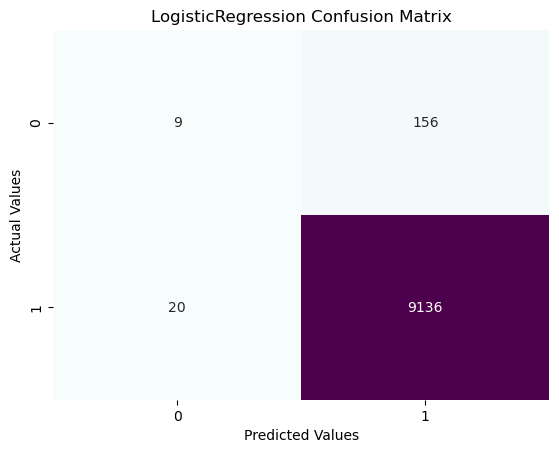

In [166]:
def my_confusion_matrix(y_test, ran_X_test1, plt_title):
    cm=confusion_matrix(y_test, ran_X_test1)
    print(classification_report(y_test, ran_X_test1))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print('LogisticRegression Accuracy Score: ',accuracy_score(y_test,ran_X_test1))
cm_rfc=my_confusion_matrix(y_test, ran_X_test1, 'LogisticRegression Confusion Matrix')

## DecisionTreeClassifier GridSearchCV

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

In [168]:
grid_X_test2=grid_search.predict(X_test_scaled)#Test Prediction
grid_x_train2=grid_search.predict(X_train_scaled)#Tranning Prediction

In [169]:
print("Test Accuracy : " ,accuracy_score(y_test,grid_X_test2))#Test Acuracy
print("Traning Accuracy : ",accuracy_score(y_train,grid_x_train2))#Tranning Accuracy

Test Accuracy :  0.9998927153738869
Traning Accuracy :  0.9998927153738869


LogisticRegression Accuracy Score:  0.9998927153738869
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       165
           2       1.00      1.00      1.00      9156

    accuracy                           1.00      9321
   macro avg       1.00      1.00      1.00      9321
weighted avg       1.00      1.00      1.00      9321



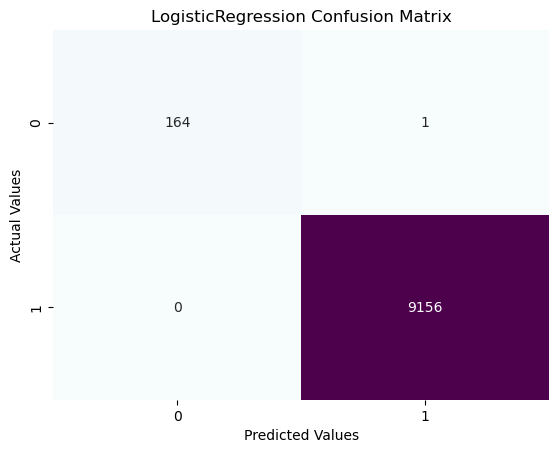

In [170]:
def my_confusion_matrix(y_test, grid_X_test2, plt_title):
    cm=confusion_matrix(y_test, grid_X_test2)
    print(classification_report(y_test, grid_X_test2))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print('LogisticRegression Accuracy Score: ',accuracy_score(y_test,grid_X_test2))
cm_rfc=my_confusion_matrix(y_test, grid_X_test2, 'LogisticRegression Confusion Matrix')

## DecisionTreeClassifier RandomizedSearchCV

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

model = DecisionTreeClassifier()
random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5)
random_search.fit(X_train_scaled, y_train)
best_params = random_search.best_params_

In [172]:
ran_X_test2=random_search.predict(X_test_scaled)#Test Prediction
ran_x_train2=random_search.predict(X_train_scaled)#Tranning Prediction

In [173]:
print("Test Accuracy : " ,accuracy_score(y_test,ran_X_test2))#Test Acuracy
print("Traning Accuracy : ",accuracy_score(y_train,ran_x_train2))#Tranning Accuracy

Test Accuracy :  0.9998927153738869
Traning Accuracy :  0.9998927153738869


LogisticRegression Accuracy Score:  0.9998927153738869
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       165
           2       1.00      1.00      1.00      9156

    accuracy                           1.00      9321
   macro avg       1.00      1.00      1.00      9321
weighted avg       1.00      1.00      1.00      9321



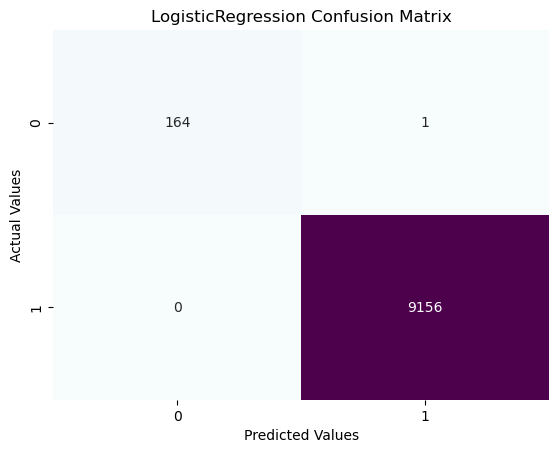

In [174]:
def my_confusion_matrix(y_test, ran_X_test2, plt_title):
    cm=confusion_matrix(y_test, ran_X_test2)
    print(classification_report(y_test, ran_X_test2))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print('LogisticRegression Accuracy Score: ',accuracy_score(y_test,ran_X_test2))
cm_rfc=my_confusion_matrix(y_test, ran_X_test2, 'LogisticRegression Confusion Matrix')

## KNN GridSearchCV

In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_


In [176]:
grid_X_test3=grid_search.predict(X_test_scaled)#Test Prediction
grid_x_train3=grid_search.predict(X_train_scaled)#Tranning Prediction

In [177]:
print("Test Accuracy : " ,accuracy_score(y_test,grid_X_test3))#Test Acuracy
print("Traning Accuracy : ",accuracy_score(y_train,grid_x_train3))#Tranning Accuracy

Test Accuracy :  0.9997854307477738
Traning Accuracy :  0.9999463576869435


LogisticRegression Accuracy Score:  0.9997854307477738
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       165
           2       1.00      1.00      1.00      9156

    accuracy                           1.00      9321
   macro avg       1.00      0.99      1.00      9321
weighted avg       1.00      1.00      1.00      9321



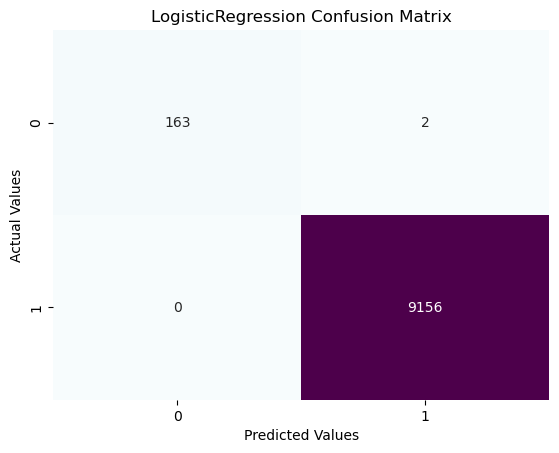

In [178]:
def my_confusion_matrix(y_test, grid_X_test3, plt_title):
    cm=confusion_matrix(y_test, grid_X_test3)
    print(classification_report(y_test, grid_X_test3))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print('LogisticRegression Accuracy Score: ',accuracy_score(y_test,grid_X_test3))
cm_rfc=my_confusion_matrix(y_test, grid_X_test3, 'LogisticRegression Confusion Matrix')

## KNN RandomizedSearchCV

In [179]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

model = KNeighborsClassifier()
random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5)
random_search.fit(X_train_scaled, y_train)
best_params = random_search.best_params_


In [180]:
ran_X_test3=random_search.predict(X_test_scaled)#Test Prediction
ran_x_train3=random_search.predict(X_train_scaled)#Tranning Prediction

In [181]:
print("Test Accuracy : " ,accuracy_score(y_test,ran_X_test3))#Test Acuracy
print("Traning Accuracy : ",accuracy_score(y_train,ran_x_train3))#Tranning Accuracy

Test Accuracy :  0.9997854307477738
Traning Accuracy :  0.9997854307477738


LogisticRegression Accuracy Score:  0.9997854307477738
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       165
           2       1.00      1.00      1.00      9156

    accuracy                           1.00      9321
   macro avg       1.00      0.99      1.00      9321
weighted avg       1.00      1.00      1.00      9321



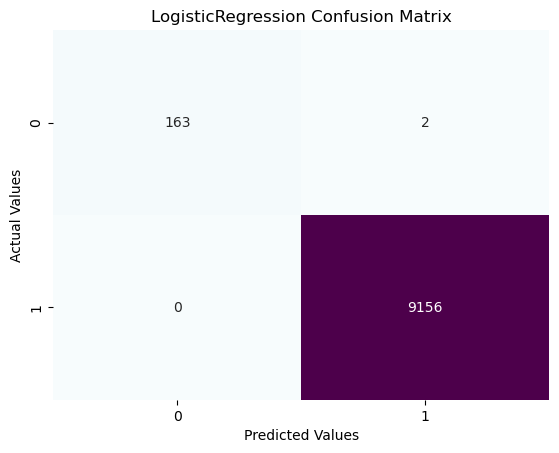

In [182]:
def my_confusion_matrix(y_test, ran_X_test3, plt_title):
    cm=confusion_matrix(y_test, ran_X_test3)
    print(classification_report(y_test, ran_X_test3))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print('LogisticRegression Accuracy Score: ',accuracy_score(y_test,ran_X_test3))
cm_rfc=my_confusion_matrix(y_test, ran_X_test3, 'LogisticRegression Confusion Matrix')

## Insight

- We have used the following types of algorithm..
* Logistic Regression - Test Accuracy- 99.77% Training accuracy 99.84%
* K-Nearest Neighbours - Test Accuracy- 99.18% Training accuracy 99.50%
* Random Forest - Test Accuracy- 99.98% Training accuracy 99.98%
* Naive Bayes - Test Accuracy- 99.52% Training accuracy 99.69%
* Decision Tree - Test Accuracy- 99.98% Training accuracy 99.99%
* Support vector machine - Test Accuracy- 98.22% Training accuracy 98.56%
* BaggingClassifier - Test Accuracy- 99.98% Training accuracy 99.99% ---------------->>> Best Model
* GradientBoostingClassifier - Test Accuracy- 99.98% Training accuracy 100% -------------->>>> Best Model

## MODEL EVALUATION

## Task 2

### Auto-Tagging Tickets: ABC Tech intends to implement a text classification ML model to automatically assign correct priorities   and departments to incoming tickets. This automation will reduce reassignment and related delays in ticket handling.

In [1757]:
data_2=data.copy()

In [1758]:
x1=data_2.drop(["Priority","CI_Cat"],axis=1)

In [1759]:
x1.head(5)

,CI_Subcat,Impact,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Changes
0,57,3,0,1.0,1.0
1,57,2,0,1.0,1.0
2,10,3,3,1.0,1.0
3,57,3,0,1.0,1.0
4,57,3,2,1.0,1.0


In [1760]:
y2=data[["CI_Cat"]]

In [1761]:
y2.value_counts()

CI_Cat
1         33010
11         7782
3          3643
10          703
6           442
9           333
4           214
5           212
8           152
7           107
2             5
0             2
Name: count, dtype: int64

In [1762]:
X_train, X_test, Y_train, Y_test = train_test_split(x1,y2,test_size=0.20,random_state=42)

In [1763]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(37284, 5)
(9321, 5)
(37284, 1)
(9321, 1)


In [1764]:
# Standardize features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [1765]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [1766]:
x_tests2=model.predict(X_test)#Test Prediction
x_trains2=model.predict(X_train)#Tranning Prediction

In [1767]:
print("Test Accuracy : " ,accuracy_score(Y_test,x_tests2))#Test Acuracy
print("Traning Accuracy : ",accuracy_score(Y_train,x_trains2))#Tranning Accuracy

Test Accuracy :  0.7104387941208025
Traning Accuracy :  0.7068984014590709


LogisticRegression Accuracy Score:  0.7104387941208025
              precision    recall  f1-score   support

           1       0.72      0.99      0.83      6627
           2       0.00      0.00      0.00         2
           3       0.35      0.06      0.11       710
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00        40
           6       0.00      0.00      0.00        89
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00        66
          10       0.00      0.00      0.00       142
          11       0.00      0.00      0.00      1554

    accuracy                           0.71      9321
   macro avg       0.10      0.10      0.09      9321
weighted avg       0.54      0.71      0.60      9321



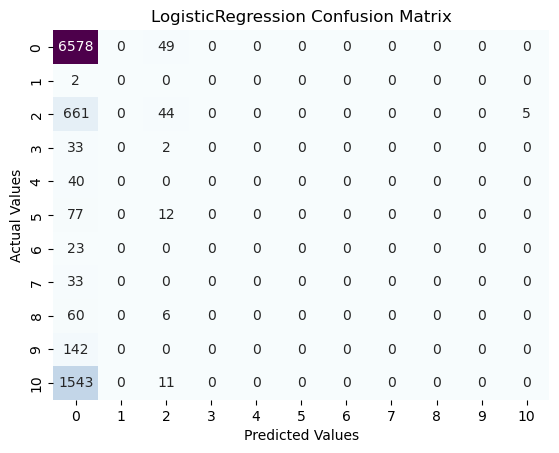

In [1768]:
def my_confusion_matrix(Y_test, x_tests2, plt_title):
    cm=confusion_matrix(Y_test, x_tests2)
    print(classification_report(Y_test, x_tests2))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print('LogisticRegression Accuracy Score: ',accuracy_score(Y_test,x_tests2))
cm_rfc=my_confusion_matrix(Y_test, x_tests2, 'LogisticRegression Confusion Matrix')

## Naive Bayes

In [1769]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [1770]:
y_pred_gnb2=gnb.predict(X_test)#Test Prediction
x_train_preGNB2=gnb.predict(X_train)#Traning Prediction

In [1771]:
print("Test Accuracy : " ,accuracy_score(Y_test,y_pred_gnb2))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(Y_train,x_train_preGNB2))#Traning accuracy

Test Accuracy :  0.07928333869756464
Traning Accuracy :  0.08215320244608948


 Naive Bayes Accuracy Score:  0.07928333869756464
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6627
           2       0.00      0.00      0.00         2
           3       0.19      0.94      0.32       710
           4       0.31      0.60      0.41        35
           5       1.00      1.00      1.00        40
           6       0.00      0.00      0.00        89
           7       0.04      0.04      0.04        23
           8       0.00      0.00      0.00        33
           9       0.00      0.02      0.00        66
          10       0.00      0.08      0.00       142
          11       0.00      0.00      0.00      1554

    accuracy                           0.08      9321
   macro avg       0.14      0.24      0.16      9321
weighted avg       0.02      0.08      0.03      9321



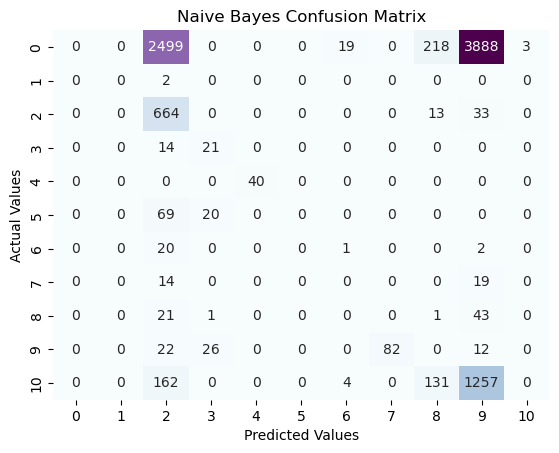

In [1772]:
def my_confusion_matrix(Y_test, y_pred_gnb2, plt_title):
    cm=confusion_matrix(Y_test, y_pred_gnb2)
    print(classification_report(Y_test, y_pred_gnb2))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' Naive Bayes Accuracy Score: ',accuracy_score(Y_test,y_pred_gnb2))
cm_rfc=my_confusion_matrix(Y_test, y_pred_gnb2, 'Naive Bayes Confusion Matrix')

## KNN Classifier

In [1773]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

In [1774]:
y_pred_knn2=knn.predict(X_test)#Test prediction
x_train_preKNN2=knn.predict(X_train)#Traning Prediction

In [1775]:
print("Test Accuracy : " ,accuracy_score(Y_test,y_pred_knn2))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(Y_train,x_train_preKNN2))#Traning Accuracy

Test Accuracy :  0.8315631370024675
Traning Accuracy :  0.838375710760648


 KNN Classifier Accuracy Score:  0.8315631370024675
              precision    recall  f1-score   support

           1       0.88      0.89      0.88      6627
           2       0.00      0.00      0.00         2
           3       0.98      0.97      0.97       710
           4       0.89      0.97      0.93        35
           5       0.95      0.93      0.94        40
           6       0.96      0.92      0.94        89
           7       0.81      0.57      0.67        23
           8       1.00      0.85      0.92        33
           9       0.92      0.91      0.92        66
          10       0.96      0.95      0.95       142
          11       0.51      0.50      0.51      1554

    accuracy                           0.83      9321
   macro avg       0.81      0.77      0.78      9321
weighted avg       0.83      0.83      0.83      9321



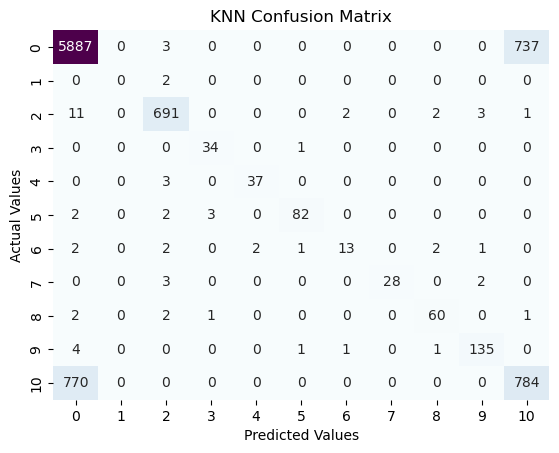

In [1776]:
def my_confusion_matrix(Y_test, y_pred_knn2, plt_title):
    cm=confusion_matrix(Y_test, y_pred_knn2)
    print(classification_report(Y_test, y_pred_knn2))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' KNN Classifier Accuracy Score: ',accuracy_score(Y_test,y_pred_knn2))
cm_rfc=my_confusion_matrix(Y_test, y_pred_knn2, 'KNN Confusion Matrix')

## SVM Classifier

In [1146]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo',kernel='rbf',C=10,gamma=0.1)
svm_clf.fit(X_train, Y_train)

SVC(C=10, decision_function_shape='ovo', gamma=0.1)

In [1147]:
y_pred_svm2=svm_clf.predict(X_test)#Test Prediction
x_train_preSVM2=svm_clf.predict(X_train)#Traning Prediction

In [1148]:
print("Test Accuracy : " ,accuracy_score(Y_test,y_pred_svm2))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(Y_train,x_train_preSVM2))#Traning Accuracy

Test Accuracy :  0.7842506168866001
Traning Accuracy :  0.788810213496406


 SVM Classifier Accuracy Score:  0.7842506168866001
              precision    recall  f1-score   support

           1       0.83      0.89      0.86      6627
           2       0.00      0.00      0.00         2
           3       0.89      0.73      0.80       710
           4       0.00      0.00      0.00        35
           5       0.69      0.55      0.61        40
           6       0.00      0.00      0.00        89
           7       0.71      0.22      0.33        23
           8       1.00      0.52      0.68        33
           9       0.00      0.00      0.00        66
          10       0.93      0.56      0.70       142
          11       0.52      0.48      0.50      1554

    accuracy                           0.78      9321
   macro avg       0.51      0.36      0.41      9321
weighted avg       0.76      0.78      0.77      9321



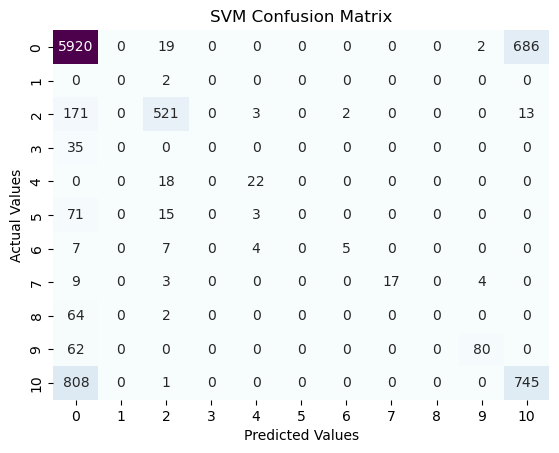

In [1149]:
def my_confusion_matrix(Y_test, y_pred_svm2, plt_title):
    cm=confusion_matrix(Y_test, y_pred_svm2)
    print(classification_report(Y_test, y_pred_svm2))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' SVM Classifier Accuracy Score: ',accuracy_score(Y_test,y_pred_svm2))
cm_rfc=my_confusion_matrix(Y_test, y_pred_svm2, 'SVM Confusion Matrix')

## Decision Tree Classifier

In [1150]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=1,min_samples_split=30,splitter="random")#object creation for decision tree  
dt.fit(X_train,Y_train)#training the model

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=30,
                       splitter='random')

In [1151]:
Prediction_of_DT2=dt.predict(X_test)#Test Prediction
x_train_preDT2=dt.predict(X_train)#Traning Prediction

In [1152]:
print("Test Accuracy : " ,accuracy_score(Y_test,Prediction_of_DT2))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(Y_train,x_train_preDT2))#Traning Accuracy

Test Accuracy :  0.8346743911597468
Traning Accuracy :  0.8403336551872117


 DecisionTree Classifier Accuracy Score:  0.8346743911597468
              precision    recall  f1-score   support

           1       0.88      0.89      0.89      6627
           2       1.00      1.00      1.00         2
           3       0.98      0.99      0.99       710
           4       0.97      1.00      0.99        35
           5       1.00      1.00      1.00        40
           6       1.00      0.87      0.93        89
           7       0.90      0.83      0.86        23
           8       1.00      1.00      1.00        33
           9       0.90      1.00      0.95        66
          10       0.86      0.99      0.92       142
          11       0.52      0.48      0.50      1554

    accuracy                           0.83      9321
   macro avg       0.91      0.91      0.91      9321
weighted avg       0.83      0.83      0.83      9321



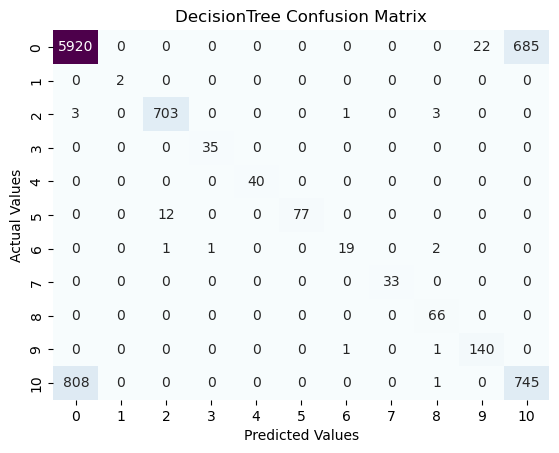

In [1153]:
def my_confusion_matrix(Y_test, Prediction_of_DT2, plt_title):
    cm=confusion_matrix(Y_test, Prediction_of_DT2)
    print(classification_report(Y_test, Prediction_of_DT2))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' DecisionTree Classifier Accuracy Score: ',accuracy_score(Y_test,Prediction_of_DT2))
cm_rfc=my_confusion_matrix(Y_test, Prediction_of_DT2, 'DecisionTree Confusion Matrix')

## Random Forest Classifier

In [1154]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,max_depth= 7,max_features= 15,min_samples_leaf= 3,min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [1155]:
rfc.fit(X_train, Y_train)
y_pred_rfc2=rfc.predict(X_test)#Test prediction 
x_train_preRFC2=rfc.predict(X_train)#Traning Prediction

In [1156]:
print("Test Accuracy : " ,accuracy_score(Y_test,y_pred_rfc2))#Test accuracy
print("Traning Accuracy : ",accuracy_score(Y_train,x_train_preRFC2))#Traning accuracy

Test Accuracy :  0.8355326681686515
Traning Accuracy :  0.8417015341701534


 Random Forest Classifier Accuracy Score:  0.8355326681686515
              precision    recall  f1-score   support

           1       0.88      0.90      0.89      6627
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00       710
           4       0.95      1.00      0.97        35
           5       1.00      1.00      1.00        40
           6       0.72      1.00      0.84        89
           7       0.96      0.96      0.96        23
           8       1.00      1.00      1.00        33
           9       1.00      0.97      0.98        66
          10       1.00      0.76      0.86       142
          11       0.52      0.48      0.50      1554

    accuracy                           0.84      9321
   macro avg       0.82      0.82      0.82      9321
weighted avg       0.83      0.84      0.83      9321



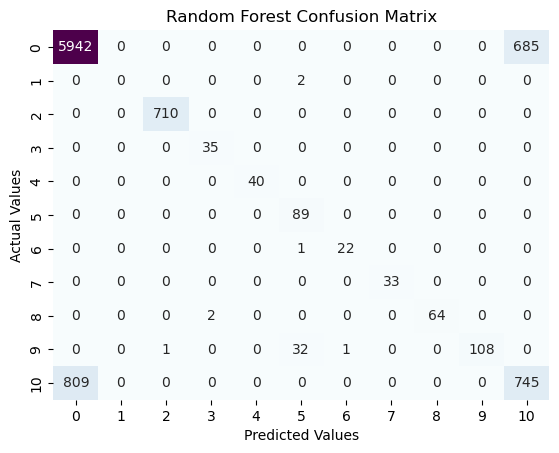

In [1157]:
def my_confusion_matrix(Y_test, y_pred_rfc2, plt_title):
    cm=confusion_matrix(Y_test, y_pred_rfc2)
    print(classification_report(Y_test, y_pred_rfc2))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' Random Forest Classifier Accuracy Score: ',accuracy_score(Y_test,y_pred_rfc2))
cm_rfc=my_confusion_matrix(Y_test, y_pred_rfc2, 'Random Forest Confusion Matrix')

## GradientBoostingClassifier

In [1158]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a GradientBoostingClassifier object with some parameters
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [1159]:
# Fit the model to the training data
gbc.fit(X_train, Y_train)

# Predict the labels of the test data
y_pred_GBC2 = gbc.predict(X_test)
x_train_preGBC2= gbc.predict(X_train)

In [1160]:
print("Test Accuracy : " ,accuracy_score(Y_test,y_pred_GBC2))#Test accuracy
print("Traning Accuracy : ",accuracy_score(Y_train,x_train_preGBC2))#Traning accuracy

Test Accuracy :  0.8391803454564961
Traning Accuracy :  0.8458856345885635


 Random Forest Classifier Accuracy Score:  0.8391803454564961
              precision    recall  f1-score   support

           1       0.88      0.89      0.89      6627
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00       710
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        89
           7       1.00      0.96      0.98        23
           8       1.00      1.00      1.00        33
           9       1.00      1.00      1.00        66
          10       0.99      1.00      1.00       142
          11       0.52      0.49      0.50      1554

    accuracy                           0.84      9321
   macro avg       0.94      0.94      0.94      9321
weighted avg       0.84      0.84      0.84      9321



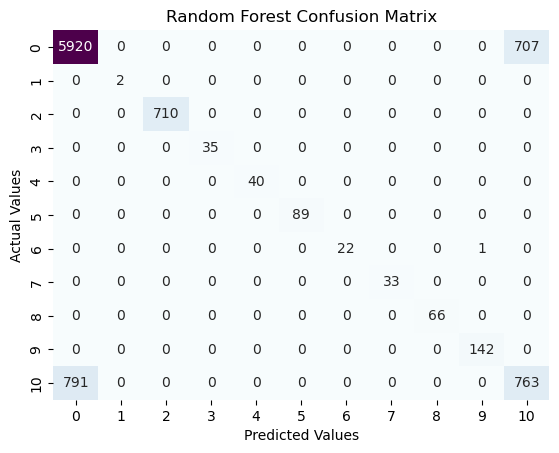

In [1161]:
def my_confusion_matrix(Y_test, y_pred_GBC2, plt_title):
    cm=confusion_matrix(Y_test, y_pred_GBC2)
    print(classification_report(Y_test, y_pred_GBC2))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' Random Forest Classifier Accuracy Score: ',accuracy_score(Y_test,y_pred_GBC2))
cm_rfc=my_confusion_matrix(Y_test, y_pred_GBC2, 'Random Forest Confusion Matrix')

## Insight

- We have used the following types of algorithm..
* Logistic Regression - Test Accuracy- 67.31% Training accuracy 67.06%
* K-Nearest Neighbours - Test Accuracy- 94.81% Training accuracy 97.04%
* Random Forest - Test Accuracy- 94.30% Training accuracy 94.21%
* Naive Bayes - Test Accuracy- 45.67% Training accuracy 46.19%
* Decision Tree - Test Accuracy- 89.65% Training accuracy 90.14%
* Support vector machine - Test Accuracy- 76.96% Training accuracy 76.94%
* BaggingClassifier - Test Accuracy- 99.19% Training accuracy 99.89%  --------------->>> Best Model
* GradientBoostingClassifier - Test Accuracy- 97.45% Training accuracy 97.68%

## MODEL EVALUATION

## Task 3

### Predicting RFC and ITSM Asset Misconfigurations: The organization aims to create predictive models for Request for Change       (RFC) and detect potential failures or misconfigurations in ITSM assets. Identifying these issues in advance will help in       preventing disruptions and improving overall ITSM asset management.

In [1777]:
df_3=data.copy()

In [1778]:
X2=data.drop(["No_of_Reassignments","No_of_Related_Changes"],axis=1)

In [1779]:
X2.head()

,CI_Cat,CI_Subcat,Impact,Priority,No_of_Related_Interactions
0,11,57,3,4,1.0
1,1,57,2,3,1.0
2,1,10,3,4,1.0
3,1,57,3,4,1.0
4,1,57,3,4,1.0


In [1780]:
Y3=data["No_of_Related_Changes"]

In [1781]:
Y3.value_counts()

No_of_Related_Changes
1.0    46581
2.0       21
3.0        2
9.0        1
Name: count, dtype: int64

In [1782]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X2,Y3,test_size=0.20,random_state=42)

In [1783]:
print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)

(37284, 5)
(9321, 5)
(37284,)
(9321,)


## Logistic Regression

In [1812]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X1_train,Y1_train)

LogisticRegression()

In [1813]:
x_tests3=model.predict(X1_test)#Test Prediction
x_trains3=model.predict(X1_train)#Tranning Prediction

In [1814]:
print("Test Accuracy : " ,accuracy_score(Y1_test,x_tests3))#Test Acuracy
print("Traning Accuracy : ",accuracy_score(Y1_train,x_trains3))#Tranning Accuracy

Test Accuracy :  0.11372170367986267
Traning Accuracy :  0.10908164360047205


LogisticRegression Accuracy Score:  0.11372170367986267
              precision    recall  f1-score   support

         1.0       1.00      0.11      0.20      9318
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0

    accuracy                           0.11      9321
   macro avg       0.25      0.03      0.05      9321
weighted avg       1.00      0.11      0.20      9321



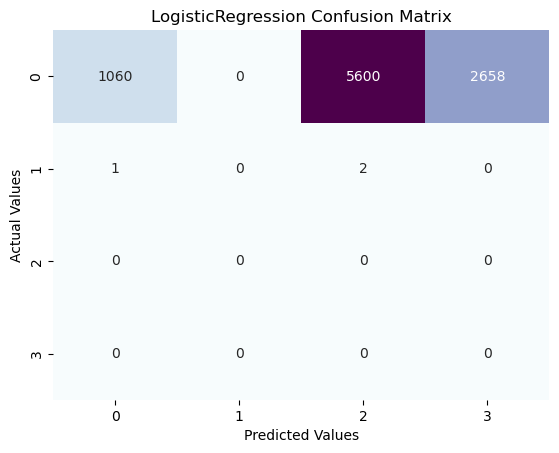

In [1815]:
def my_confusion_matrix(Y1_test, x_tests3, plt_title):
    cm=confusion_matrix(Y1_test, x_tests3)
    print(classification_report(Y1_test, x_tests3))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print('LogisticRegression Accuracy Score: ',accuracy_score(Y1_test,x_tests3))
cm_rfc=my_confusion_matrix(Y1_test, x_tests3, 'LogisticRegression Confusion Matrix')

## Naive Bayes

In [1788]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X1_train, Y1_train)

GaussianNB()

In [1789]:
y_gnb=gnb.predict(X1_test)#Test Prediction
x_gnb=gnb.predict(X1_train)#Traning Prediction

In [1790]:
print("Test Accuracy : " ,accuracy_score(Y1_test,y_gnb))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(Y1_train,x_gnb))#Traning accuracy

Test Accuracy :  0.8752279798304903
Traning Accuracy :  0.8780442012659586


 Naive Bayes Accuracy Score:  0.8752279798304903
              precision    recall  f1-score   support

         1.0       1.00      0.88      0.93      9318
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0

    accuracy                           0.88      9321
   macro avg       0.25      0.22      0.23      9321
weighted avg       1.00      0.88      0.93      9321



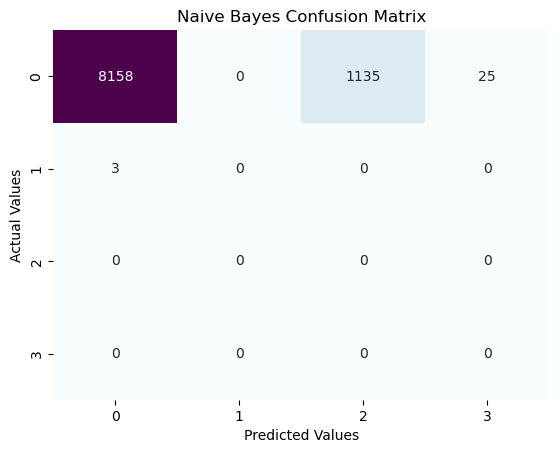

In [1791]:
def my_confusion_matrix(Y1_test, y_gnb, plt_title):
    cm=confusion_matrix(Y1_test, y_gnb)
    print(classification_report(Y1_test, y_gnb))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' Naive Bayes Accuracy Score: ',accuracy_score(Y1_test,y_gnb))
cm_rfc=my_confusion_matrix(Y1_test, y_gnb, 'Naive Bayes Confusion Matrix')

## KNN Classifier

In [1792]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X1_train, Y1_train)

KNeighborsClassifier(metric='euclidean')

In [1793]:
y_pred_knn3=knn.predict(X1_test)#Test prediction
x_train_preKNN3=knn.predict(X1_train)#Traning Prediction

In [1794]:
print("Test Accuracy : " ,accuracy_score(Y1_test,y_pred_knn3))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(Y1_train,x_train_preKNN3))#Traning Accuracy

Test Accuracy :  0.9996781461216607
Traning Accuracy :  0.9994367557129064


 KNN Classifier Accuracy Score:  0.9996781461216607
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      9318
         2.0       0.00      0.00      0.00         3

    accuracy                           1.00      9321
   macro avg       0.50      0.50      0.50      9321
weighted avg       1.00      1.00      1.00      9321



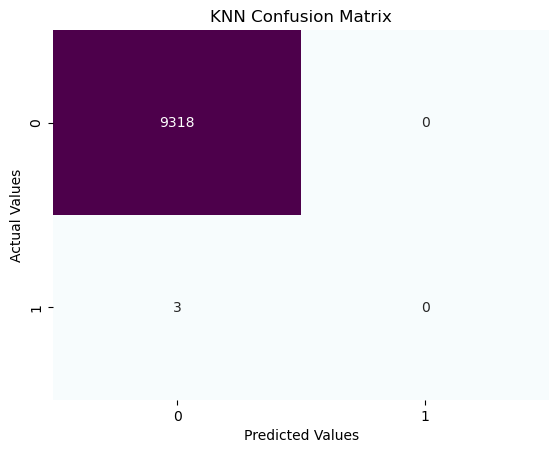

In [1795]:
def my_confusion_matrix(Y1_test, y_pred_knn3, plt_title):
    cm=confusion_matrix(Y1_test, y_pred_knn3)
    print(classification_report(Y1_test, y_pred_knn3))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' KNN Classifier Accuracy Score: ',accuracy_score(Y1_test,y_pred_knn3))
cm_rfc=my_confusion_matrix(Y1_test, y_pred_knn3, 'KNN Confusion Matrix')

## SVM Classifier

In [1796]:
from sklearn import svm
svm_clf = svm.SVC(kernel='rbf',C=10,gamma=0.1)
svm_clf.fit(X1_train, Y1_train)

SVC(C=10, gamma=0.1)

In [1797]:
y_pred_svm3=svm_clf.predict(X1_test)#Test Prediction
x_train_preSVM3=svm_clf.predict(X1_train)#Traning Prediction

In [1798]:
print("Test Accuracy : " ,accuracy_score(Y1_test,y_pred_svm3))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(Y1_train,x_train_preSVM3))#Traning Accuracy

Test Accuracy :  0.9996781461216607
Traning Accuracy :  0.9994367557129064


 SVM Classifier Accuracy Score:  0.9996781461216607
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      9318
         2.0       0.00      0.00      0.00         3

    accuracy                           1.00      9321
   macro avg       0.50      0.50      0.50      9321
weighted avg       1.00      1.00      1.00      9321



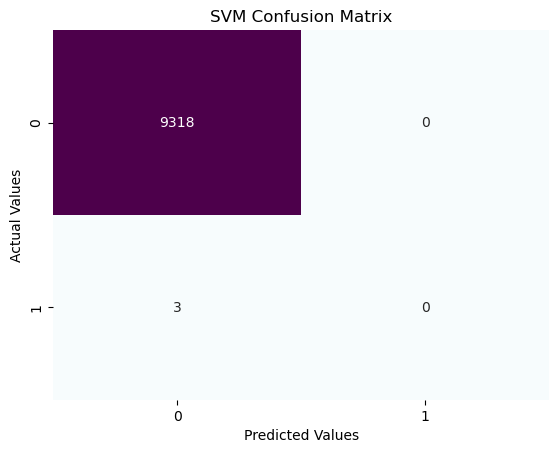

In [1799]:
def my_confusion_matrix(Y1_test, y_pred_svm3, plt_title):
    cm=confusion_matrix(Y1_test, y_pred_svm3)
    print(classification_report(Y1_test, y_pred_svm3))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' SVM Classifier Accuracy Score: ',accuracy_score(Y1_test,y_pred_svm3))
cm_rfc=my_confusion_matrix(Y1_test, y_pred_svm3, 'SVM Confusion Matrix')

## Decision Tree Classifier

In [1800]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=1,min_samples_split=30,splitter="random")#object creation for decision tree  
dt.fit(X1_train,Y1_train)#training the model

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=30,
                       splitter='random')

In [1801]:
Prediction_of_DT3=dt.predict(X1_test)#Test Prediction
x_train_preDT3=dt.predict(X1_train)#Traning Prediction

In [1802]:
print("Test Accuracy : " ,accuracy_score(Y1_test,Prediction_of_DT3))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(Y1_train,x_train_preDT3))#Traning Accuracy

Test Accuracy :  0.9996781461216607
Traning Accuracy :  0.9994367557129064


 DecisionTree Classifier Accuracy Score:  0.9996781461216607
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      9318
         2.0       0.00      0.00      0.00         3

    accuracy                           1.00      9321
   macro avg       0.50      0.50      0.50      9321
weighted avg       1.00      1.00      1.00      9321



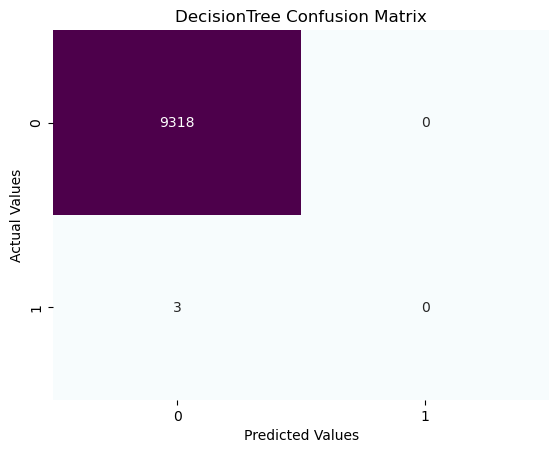

In [1803]:
def my_confusion_matrix(Y1_test, Prediction_of_DT3, plt_title):
    cm=confusion_matrix(Y1_test, Prediction_of_DT3)
    print(classification_report(Y1_test, Prediction_of_DT3))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' DecisionTree Classifier Accuracy Score: ',accuracy_score(Y1_test,Prediction_of_DT3))
cm_rfc=my_confusion_matrix(Y1_test, Prediction_of_DT3, 'DecisionTree Confusion Matrix')

## Random Forest Classifier

In [1804]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,max_depth= 7,max_features= 15,min_samples_leaf= 3,min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [1805]:
rfc.fit(X1_train, Y1_train)
y_pred_rfc3=rfc.predict(X1_test)#Test prediction 
x_train_preRFC3=rfc.predict(X1_train)#Traning Prediction

In [1806]:
print("Test Accuracy : " ,accuracy_score(Y1_test,y_pred_rfc3))#Test accuracy
print("Traning Accuracy : ",accuracy_score(Y1_train,x_train_preRFC3))#Traning accuracy

Test Accuracy :  0.9996781461216607
Traning Accuracy :  0.9994367557129064


 Random Forest Classifier Accuracy Score:  0.9996781461216607
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      9318
         2.0       0.00      0.00      0.00         3

    accuracy                           1.00      9321
   macro avg       0.50      0.50      0.50      9321
weighted avg       1.00      1.00      1.00      9321



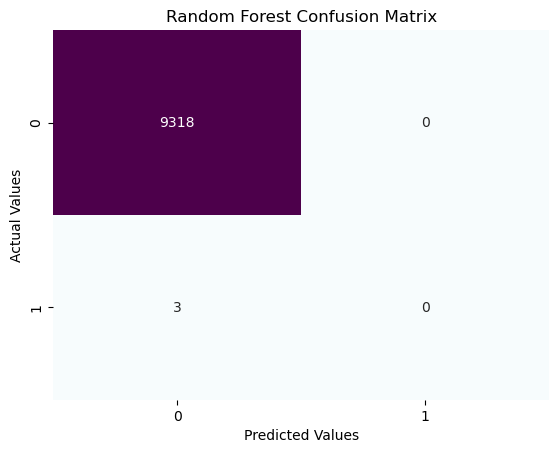

In [1807]:
def my_confusion_matrix(Y1_test, y_pred_rfc3, plt_title):
    cm=confusion_matrix(Y1_test, y_pred_rfc3)
    print(classification_report(Y1_test, y_pred_rfc3))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' Random Forest Classifier Accuracy Score: ',accuracy_score(Y1_test,y_pred_rfc3))
cm_rfc=my_confusion_matrix(Y1_test, y_pred_rfc3, 'Random Forest Confusion Matrix')

## GradientBoostingClassifier

In [1808]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a GradientBoostingClassifier object with some parameters
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [1809]:
# Fit the model to the training data
gbc.fit(X1_train, Y1_train)

# Predict the labels of the test data
y_pred_GBC3 = gbc.predict(X1_test)
x_train_preGBC3= gbc.predict(X1_train)

In [1810]:
print("Test Accuracy : " ,accuracy_score(Y1_test,y_pred_GBC3))#Test accuracy
print("Traning Accuracy : ",accuracy_score(Y1_train,x_train_preGBC3))#Traning accuracy

Test Accuracy :  0.9963523227121553
Traning Accuracy :  0.9949576225726854


 GradientBoostingClassifier Accuracy Score:  0.9963523227121553
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      9318
         2.0       0.00      0.00      0.00         3
         9.0       0.00      0.00      0.00         0

    accuracy                           1.00      9321
   macro avg       0.33      0.33      0.33      9321
weighted avg       1.00      1.00      1.00      9321



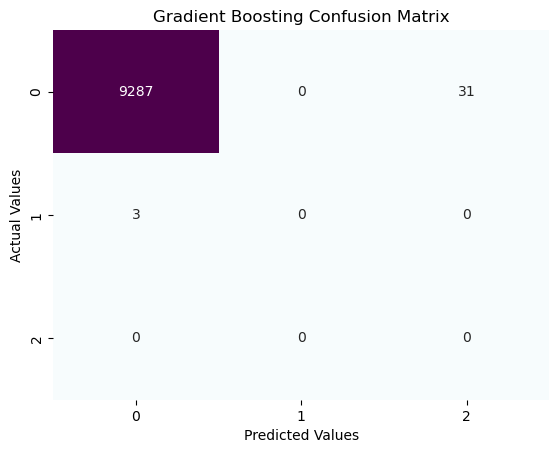

In [1819]:
def my_confusion_matrix(Y1_test, y_pred_GBC3, plt_title):
    cm=confusion_matrix(Y1_test, y_pred_GBC3)
    print(classification_report(Y1_test, y_pred_GBC3))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' GradientBoostingClassifier Accuracy Score: ',accuracy_score(Y1_test,y_pred_GBC3))
cm_rfc=my_confusion_matrix(Y1_test, y_pred_GBC3, 'Gradient Boosting Confusion Matrix')

## Insight

- We have used the following types of algorithm..
* Logistic Regression - Test Accuracy- 99.03% Training accuracy 98.79%
* K-Nearest Neighbours - Test Accuracy- 99.03% Training accuracy 98.93%
* Random Forest - Test Accuracy- 99.05% Training accuracy 98.79%  --------------->>>> Best Model
* Naive Bayes - Test Accuracy- 87.44% Training accuracy 87.75%
* Decision Tree - Test Accuracy- 98.99% Training accuracy 98.80%
* Support vector machine - Test Accuracy- 99.05% Training accuracy 98.79%
* BaggingClassifier - Test Accuracy- 98.72% Training accuracy 99.64%
* GradientBoostingClassifier - Test Accuracy- 98.90% Training accuracy 98.96%